In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import time
import glob
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices, seed
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
import scipy.stats as stats
from scipy.stats import norm, truncnorm, beta
import h5py
from sklearn.neighbors import KernelDensity
from scipy import stats
from matplotlib.ticker import AutoMinorLocator
from IPython.display import clear_output
from scipy.special import erf
from scipy import stats
from scipy.special import comb


In [25]:
def make_cmap(colors, position, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    bit_rgb = np.linspace(0,1,256)
    # if position == None:
    #     position = np.linspace(0,1,len(colors))
    # else:
    if len(position) != len(colors):
        sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
        sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap
def choose_cmap(custom_cmap, reverse_cmap=False):

    custom_cmaps = {'my diverging red blue': [(204/255, 230/255, 255/255),
                                              (0/255, 102/255, 204/255),
                                              (51/255, 0/255, 102/255),
                                              (255/255, 0/255, 102/255),
                                              (255/255, 230/255, 243/255)],
                    'my blue yellow red': [(0 / 255, 74 / 255, 171 / 255),
                                        (255 / 255, 209 / 255, 26 / 255),
                                        (178 / 255, 0 / 255, 3 / 255)],
                    'McLaren 2022': [(0/255, 38/255, 77/255),
                                    (211/255, 0/255, 87/255),
                                    (255/255, 153/255, 0/255),
                                    (191/255, 217/255, 217/255)],
                    'vibrant candy': [(0/255, 26/255, 77/255),
                                    (204/255, 0/255, 102/255),
                                    (255/255, 204/255, 0/255),
                                    (153/255, 255/255, 153/255)],
                    'ice queen': [(37/255, 0/255, 51/255),
                                  (0/255, 155/255, 153/255),
                                  (214/255, 255/255, 214/255)],
                    'ice queen2': [(0/255, 0/255, 0/255),
                                   (0/255, 134/255, 179/255),
                                   (255/255, 255/255, 200/255)],
                    'amazon queen': [(0/255, 0/255, 0/255),
                                     (25/255, 103/255, 103/255),
                                     (119/255, 179/255, 105/255),
                                     (255/255, 234/255, 0/255),
                                     (255/255, 255/255, 255/255)],
                    'amazon queen2': [(0/255, 34/255, 51/255),
                                      (25/255, 103/255, 103/255),
                                    #   (119/255, 179/255, 105/255),
                                    #   (63/255, 211/255, 146/255),
                                      (255/255, 234/255, 0/255)],
                    'colorado sunrise': [(0/255, 17/255, 51/255),
                                         (234/255, 74/255, 104/255),
                                         (255/255, 224/255, 102/255)],
                    'muted rbg': [(102/255, 0/255, 51/255),
                                  (0/255, 85/255, 128/255),
                                  (140/255, 153/255, 0/255)],
                    'perceptual rbg': [(102/255, 0/255, 51/255),
                                       (60/255, 40/255, 90/255),
                                       (0/255, 102/255, 153/255),
                                       (134/255, 179/255, 0/255),
                                       (255/255, 200/255, 50/255),
                                       (255/255, 255/255, 160/255)],
                    'mclaren livery': [(0/255, 119/255, 179/255),
                                       (204/255, 0/255, 102/255),
                                    #    (255/255, 128/255, 0/255),
                                       (255/255, 153/255, 0/255),
                                       (207/255, 226/255, 226/255)],
                    'volcanic sunrise': [(0/255, 51/255, 77/255),
                                  (153/255, 0/255, 77/255),
                                  (255/255, 80/255, 80/255),
                                  (255/255, 255/255, 153/255)],
                    'cyber grape': [(51/255, 0/255, 51/255),
                                    (128/255, 0/255, 128/255),
                                    (153/255, 102/255, 255/255),
                                    (204/255, 255/255, 255/255)],
                    'cyber grape2': [(51/255, 0/255, 51/255),
                                     (128/255, 0/255, 128/255),
                                     (255/255, 153/255, 204/255),
                                     (204/255, 255/255, 255/255)],
                    'black limeaid': [(0/255, 0/255, 77/255),
                                      (102/255, 153/255, 153/255),
                                      (204/255, 255/255, 51/255)],
                    'raspberry punch1': [(51/255, 0/255, 102/255),
                                        (51/255, 204/255, 224/255),
                                        (248/255, 255/255, 230/255)],
                    'raspberry punch2': [(70/255, 0/255, 0/255),
                                        (89/255, 0/255, 179/255),
                                        (51/255, 204/255, 224/255),
                                        (255/255, 255/255, 200/255)],
                    'raspberry punch': [(51/255, 0/255, 102/255),
                                        # (89/255, 0/255, 179/255),
                                        (51/255, 204/255, 224/255),
                                        (255/255, 255/255, 200/255)],
                    }

    chosen_cmap = custom_cmaps[custom_cmap]
    pos_diff = 1./(len(chosen_cmap)-1)
    positions = np.arange(0, 1+pos_diff, pos_diff)
    if reverse_cmap == True:
        chosen_cmap = chosen_cmap[::-1]
    mycolormap = make_cmap(chosen_cmap, position=positions)

    return mycolormap

# Replace a lot of my style with Nature Style
plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')
plt.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['mathtext.fontset'] = 'stixsans'
mpl.rcParams['mathtext.it'] = 'stixsans'
mpl.rcParams['mathtext.rm'] = 'stixsans'
mpl.rcParams['font.weight'] = 'light'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['mathtext.bf'] = 'stixsans'
mpl.rcParams['xtick.major.size'] = 3.0
mpl.rcParams['xtick.minor.size'] = 1.70
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['ytick.major.size'] = 3.0
mpl.rcParams['ytick.minor.size'] = 1.70
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True



Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [28]:
def unique(list_of_values):
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

def weighted_mean(meas, meas_err):
    try:
        weight = 1./(np.array(meas_err)**2)
    except:
        print('Error calculating weighted mean!')
        print(meas, ',', meas_err)
    else:
        w_mean = sum(weight * np.array(meas)) / sum(weight)
        w_mean_err = 1./np.sqrt(sum(weight))

    return w_mean, w_mean_err

def compute_adopted_parameter_value(targ_name, keyword, meas, meas_err, meas_ref):

    # possible_keywords = i disk (deg), vsini (km/s), Prot (d), Rstar (Rsun), Mstar (Msun)

    verbose = False # [DONT FORGET TO SET WHICH KEYWORD YOU WANT TO PRINT IF YOU SET VERBOSE = TRUE]
    if verbose == True:
        if keyword == 'Rstar (Rsun)':
            print('-------------------------------------------')
            print('\n' + targ_name)
            print(' ')
            print(keyword)
        else:
            verbose = False

    # ----------------------------------------------------------------------------------
    if (len(meas) > 0) and (verbose == True):
        print('INPUT SET OF MEASURED VALUES AND UNCERTAINTIES:')
        for bep_i in range(len(meas)):
            if meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                print(meas[bep_i], meas_err[bep_i], 'ADOPTED')
            elif meas_ref[bep_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                print(meas[bep_i], meas_err[bep_i], 'YU')
            else:
                print(meas[bep_i], meas_err[bep_i])
        print(' ')
    # ----------------------------------------------------------------------------------

    if keyword == 'i disk (deg)':
        if isinstance(meas[0], str) == True:
            if '[' in meas[0]:
                weighted_mean_val, weighted_mean_err = meas[0], float('nan')
                return weighted_mean_val, weighted_mean_err
            

    
    meas1 = []
    meas_err1 = []
    meas_ref1 = []
    for meas_i in range(len(meas)):
        meas_val = meas[meas_i]
        err_val = meas_err[meas_i]
        ref_val = meas_ref[meas_i]
        if isinstance(meas_val, str) == True:
            if '>' in meas_val:
                meas_val = float('nan')
                err_val = float('nan')
            elif '<' in meas_val:
                if keyword == 'vsini (km/s)':
                    meas_val_split = meas_val.split('<')
                    meas_val = float(meas_val_split[-1])
                    err_val = 'ulimit'
                else:
                    meas_val = float('nan')
                    err_val = float('nan')
            elif '-' in meas_val:
                meas_val_split = meas_val.split('-')
                meas_val_limits = [float(parval) for parval in meas_val_split]
                meas_val = np.nanmean(meas_val_limits) 
                err_val = np.nanmean(meas_val_limits) - np.nanmin(meas_val_limits)
            else:
                meas_val = float(meas_val)

        elif np.isnan(meas_val) == True:
            continue
            # err_val = float('nan')
        
        if keyword == 'i disk (deg)':
            if type(meas_val) != str:
                if meas_val > 90:
                    meas_val = abs(meas_val - 180)
                if meas_val < 0:
                    meas_val = abs(meas_val)

        meas1.append(meas_val)
        meas_err1.append(err_val)
        meas_ref1.append(ref_val)


    if len(np.where(np.array(meas1) > 0)[0]) == 0:
        return [], []


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas1) > 0:
            for bep1_i in range(len(meas1)):
                if meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'ADOPTED')
                elif meas_ref1[bep1_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas1[bep1_i], meas_err1[bep1_i], 'YU')
                else:
                    print(meas1[bep1_i], meas_err1[bep1_i])
        print('  ')
    # ----------------------------------------------------------------------------------


    meas2 = []
    meas_err2 = []
    meas_ref2 = []
    for meas1_i in range(len(meas1)):
        meas1_val = meas1[meas1_i]
        err1_val = meas_err1[meas1_i]
        ref1_val = meas_ref1[meas1_i]
        if type(err1_val) == str:
            if err1_val == '-':
                err1_val = float('nan')

            elif ',' in err1_val:

                err1_val_split = err1_val.split(',')
                err1_val_limits = [float(parval) for parval in err1_val_split]

                if keyword == 'i disk (deg)':
                    
                    meas_range = [meas1[meas1_i] + err1_val_limits[0], meas1[meas1_i] - err1_val_limits[1]]
                    meas1_val = np.mean(meas_range)
                    err1_val = meas1_val - meas_range[1]

                    # print('\n')
                    # print(targ_name)
                    # print('meas_range: ', meas_range)
                    # print('meas1_val: ', meas1_val)
                    # print('err1_val: ', err1_val)
                    # print('\n')

                else:
                    err1_val = np.nanmean(err1_val_limits)
        
        meas2.append(meas1_val)
        meas_ref2.append(ref1_val)
        if err1_val != 'ulimit':
            meas_err2.append(float(err1_val))
        else:
            meas_err2.append(err1_val)


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('UNCERTAINTIES NOW CLEANED OF NON-NUMBER CHARACTERS AND CONVERTED TO FLOAT')
        if len(meas2) > 0:
            for bep2_i in range(len(meas2)):
                if meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'ADOPTED')
                elif meas_ref2[bep2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[bep2_i], meas_err2[bep2_i], 'YU')
                else:
                    print(meas2[bep2_i], meas_err2[bep2_i])
        print(' ')
    # ----------------------------------------------------------------------------------


    if keyword == 'Rstar (Rsun)':
        meas_temporary = []
        meas_err_temporary = []
        meas_ref_temporary = []

        for meas_temp_i in range(len(meas_ref2)):
            meas_temporary.append(meas2[meas_temp_i])
            meas_ref_temporary.append(meas_ref2[meas_temp_i])
            if meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':  # Stassun Radius
                # If there is a stassun uncertainty, go ahead and inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == False:
                    meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.07*meas2[meas_temp_i])**2))
                # If there is NOT a stassun uncertainty, adopt an initial 16% uncertainty and then inflate it by 7%
                if np.isnan(meas_err2[meas_temp_i]) == True:
                    err_temp = 0.16 * meas2[meas_temp_i]
                    meas_err_temporary.append(np.sqrt(err_temp**2 + (0.07*meas2[meas_temp_i])**2))
            elif meas_ref2[meas_temp_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':  # Yu Radius
                # Yu radii should always have uncertainties. Go ahead and inflate it by 4.9%
                meas_err_temporary.append(np.sqrt(meas_err2[meas_temp_i]**2 + (0.049*meas2[meas_temp_i])**2))
            else:
                meas_err_temporary.append(meas_err2[meas_temp_i])

        meas2 = np.copy(meas_temporary)
        meas_err2 = np.copy(meas_err_temporary)
        meas_ref2 = np.copy(meas_ref_temporary)

        # ----------------------------------------------------------------------------------
        if verbose == True:
            print('RADIUS CORRECTIONS NOW MADE FOR STASSUN AND YU RADII')
            for temp2_i in range(len(meas2)):
                if meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2019AJ....158..138S/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'ADOPTED')
                elif meas_ref2[temp2_i] == 'https://ui.adsabs.harvard.edu/abs/2023ApJS..264...41Y/abstract':
                    print(meas2[temp2_i], meas_err2[temp2_i], 'YU')
                else:
                    print(meas2[temp2_i], meas_err2[temp2_i])
            print(' ')
        # ----------------------------------------------------------------------------------


    meas3 = []
    meas_err3 = []

    if len(meas2) > 0:
        meas_with_nan_unc = []
        meas_ref_with_nan_unc = []
        for meas2_i in range(len(meas2)):
            if meas_err2[meas2_i] == 'ulimit':
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == False):
                meas3.append(meas2[meas2_i])
                meas_err3.append(meas_err2[meas2_i])
            elif (np.isnan(meas2[meas2_i]) == False) and (np.isnan(meas_err2[meas2_i]) == True):
                meas_with_nan_unc.append(meas2[meas2_i])
                meas_ref_with_nan_unc.append(meas_ref2[meas2_i])
        # COMBINE VALUES THAT DO NOT HAVE UNCERTAINTIES INTO ONE MEASUREMENT W/ UNCERTAINTY EQUAL TO THE STDDEV
        if len(meas_with_nan_unc) > 1:
            mean_meas2 = np.mean(meas_with_nan_unc)
            std_meas2 = np.std(meas_with_nan_unc, ddof=1)
            meas3.append(mean_meas2)
            meas_err3.append(std_meas2)
        # IF THERE IS ONLY ONE MEASUREMENT WITH NO UNCERTAINTY, ADOPT 5% UNCERTAINTY FOR VSINI, 10% FOR PROT, AND 10% FOR ALL ELSE
        if (len(meas_with_nan_unc) == 1) and (len(meas3) == 0):
            meas3.append(meas2[0])
            if keyword == 'vsini (km/s)':
                meas_err3.append(0.05 * meas2[0])
            elif keyword == 'Prot (d)':
                meas_err3.append(0.20 * meas2[0])
            else:
                meas_err3.append(meas2[0])


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('MEASUREMENTS WITHOUT UNCERTAINTIES NOW COMBINED. IF ONLY 1 AMONG SEVERAL, IT HAS BEEN REMOVED')
        if len(meas3) > 0:
            for bep3_i in range(len(meas3)):
                print(meas3[bep3_i], meas_err3[bep3_i])
            print(' ')
    # ----------------------------------------------------------------------------------


    # IMPOSE LOWER LIMIT OF 5% UNCERTAINTY FOR VSINI VALUES (AND ONLY VSINI VALUES)
    meas4 = []
    meas_err4 = []
    if len(meas3) > 0:
        if keyword == 'vsini (km/s)':
            for meas3_i in range(len(meas3)):
                if meas_err3[meas3_i] == 'ulimit':
                    meas4.append(meas3[meas3_i])
                    meas_err4.append(meas_err3[meas3_i])
                elif meas_err3[meas3_i] >= 0.05 * meas3[meas3_i]:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(meas_err3[meas3_i]))
                else:
                    meas4.append(float(meas3[meas3_i]))
                    meas_err4.append(float(0.05 * meas3[meas3_i]))
                    # print('Updated reported uncertainty to minimum value')
        else:
            for meas3_i in range(len(meas3)):
                meas4.append(float(meas3[meas3_i]))
                meas_err4.append(float(meas_err3[meas3_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        if keyword == 'vsini (km/s)':
            print('VSINI LIMIT ON UNCERTAINTY NOW IMPOSED:')
            if len(meas4) > 0:
                for bep4_i in range(len(meas4)):
                    print(meas4[bep4_i], meas_err4[bep4_i])
                print(' ')
    # ----------------------------------------------------------------------------------



    meas5 = []
    meas_err5 = []
    if len(meas4) > 0:
        for meas4_i in range(len(meas4)):
            if meas_err4[meas4_i] == 'ulimit':
                meas5.append(meas4[meas4_i])
                meas_err5.append(meas_err4[meas4_i])
            elif (np.isnan(meas4[meas4_i]) == False) and (np.isnan(meas_err4[meas4_i]) == False):
                meas5.append(float(meas4[meas4_i]))
                meas_err5.append(float(meas_err4[meas4_i]))


    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('FINAL SET OF MEASURED VALUES AND UNCERTAINTIES:')
        if len(meas5) > 0:
            for bep5_i in range(len(meas5)):
                print(meas5[bep5_i], meas_err5[bep5_i])
            print(' ')
    # ----------------------------------------------------------------------------------



    # DETERMINE WEIGHTED MEAN OF THE FINAL SET OF MEASURED VALUES
    if len(meas5) == 1:
        weighted_mean_val, weighted_mean_err = meas5[0], meas_err5[0]
    if len(meas5) > 1:
        weighted_mean_val, weighted_mean_err = weighted_mean(meas=meas5, meas_err=meas_err5)
        if keyword == 'Rstar (Rsun)':
            print(' ')
            print(targ_name)
            print('RSTAR IS WEIGHTED MEAN OF A SET OF VALUES.\n')
            weighted_mean_err *= 2.5

    # if keyword != 'i disk (deg)':
    #     if type(weighted_mean_err) == float:
    #         if weighted_mean_err / weighted_mean_val < 0.05:
    #             weighted_mean_err = 0.05 * weighted_mean_val

    # ----------------------------------------------------------------------------------
    if verbose == True:
        print('WEIGHTED MEAN:')
        print(weighted_mean_val, weighted_mean_err)
        print(' ')
        print('-------------------------------------------')
    # ----------------------------------------------------------------------------------


    

    return weighted_mean_val, weighted_mean_err

def determine_sptype(letters, numbers):

    possible_letters = ['B', 'A', 'F', 'G', 'K', 'M']

    full_del1 = []
    full_del1_std = []
    for let_i in range(len(letters)):
        let_val = letters[let_i]
        num_val = numbers[let_i]
        # print('let_val: ', let_val)
        if isinstance(let_val, str) == True:
            # Determine if a specral type exists for this star. If not, return nans
            if (let_val == '-') and (num_val == '-'):
                return [float('nan')], [float('nan')]
            elif '+' in let_val:
                return [float('nan')], [float('nan')]
            elif '-' in let_val:
                let_val_split = str(let_val).split('-')
                num_val_split = str(num_val).split('-')
                temp_full_del = []
                for let_j in range(len(let_val_split)):
                    let_val_space_removed = let_val_split[let_j].replace(' ','')
                    for poss_let in range(len(possible_letters)):
                        if possible_letters[poss_let] == let_val_space_removed:
                            temp_del = poss_let
                            break
                    temp_num = float(num_val_split[let_j].replace(' ',''))
                    if temp_num == '?':
                        temp_num = 5.
                    temp_full_del.append(temp_del + 0.1*temp_num)
                mean_full_del = np.mean(temp_full_del)
                std_full_del = np.std(temp_full_del, ddof=1)

                full_del1.append(mean_full_del)
                full_del1_std.append(std_full_del)
            else:
                let_val_space_removed = let_val.replace(' ','')
                for poss_let in range(len(possible_letters)):
                    if possible_letters[poss_let] == let_val_space_removed:
                        let_del = poss_let
                        break
                if num_val == '?':
                    num_val = 5.
                full_del1.append(let_del + 0.1*float(num_val))
                full_del1_std.append(float('nan'))
        else:
            continue

    # print('full_del1')
    # print(full_del1, full_del1_std)

    full_del2 = []
    full_del2_std = []

    full_del2_no_std = []
    for del1_i in range(len(full_del1)):
        if np.isnan(full_del1_std[del1_i]) == True:
            full_del2_no_std.append(full_del1[del1_i])
        else:
            full_del2.append(full_del1[del1_i])
            full_del2_std.append(full_del1_std[del1_i])
    if len(full_del2_no_std) == 1:
        full_del2.append(full_del2_no_std[0])
        full_del2_std.append(1e-4)
    if len(full_del2_no_std) == 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(0.5*abs(full_del1[1] - full_del1[0]))
    if len(full_del2_no_std) > 2:
        full_del2.append(np.nanmean(full_del1))
        full_del2_std.append(np.nanstd(full_del1))
            
    
    # print('full_del2')
    # print(full_del2, full_del2_std)
    
    
    return full_del2, full_del2_std

def mode_pm_highest_density_interval(x, pdf_y, sigma, return_pdf=False):
    # 1sigma makes sigma = 0.6826

    x_interp = np.arange(np.nanmin(x), np.nanmax(x)+0.001, 0.001)
    pdf_y = np.interp(x=x_interp, xp=x, fp=pdf_y)
    x = x_interp

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    mode = x[pdf_y == max(pdf_y)]
    if len(mode) > 1:
        print('BAP', min(mode), max(mode), np.mean(mode))
        mode = np.mean(mode)
    else:
        mode = mode[0]
    # print('The lower x value (for minimum credible interval) is ', xlower[index])
    # print('The upper x value (for minimum credible interval) is ', xupper[index])

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    if return_pdf == True:
        return mode, lower, upper, x, pdf_y
    if return_pdf == False:
        return mode, lower, upper

def SpType_num_to_str(sptype_num, sptype_num_err):

    sptype_base_num = int(np.floor(sptype_num))

    if sptype_base_num == 2:
        sptype_str_letter = 'F'
    if sptype_base_num == 3:
        sptype_str_letter = 'G'
    if sptype_base_num == 4:
        sptype_str_letter = 'K'
    if sptype_base_num == 5:
        sptype_str_letter = 'M'

    sptype_cat_num = np.round((sptype_num - sptype_base_num) * 10, 1)
    sptype_cat_str = str(sptype_cat_num)

    sptype_str = sptype_str_letter + sptype_cat_str

    sptype_num_err = np.round(sptype_num_err * 10, 1)
    if sptype_num_err == 0.0:
        sptype_num_err = 0.01
    sptype_str_err = str(sptype_num_err)

    return sptype_str, sptype_str_err

# Selection functions to test the effect of alternate istar posterior distributions
def selection_function1(i_deg):
    transition_x1 = 15
    transition_x2 = 60
    i_deg_lo = i_deg[i_deg < transition_x1]
    i_deg_sin = i_deg[(i_deg >= transition_x1) & (i_deg <= transition_x2)]
    i_deg_hi = i_deg[i_deg > transition_x2]

    
    sini = np.sin(np.radians(i_deg_sin))
    # lo_i = sini[0] * (i_deg_lo / transition_x1)**2

    lo_i = (sini[0] / (transition_x1 - 7)) * i_deg_lo - 7*sini[0]/(transition_x1 - 7)

    hi_i = [sini[-1]] * len(i_deg_hi)

    S_i = np.concatenate((lo_i, sini, hi_i))

    return S_i

def selection_function2(i_deg):
    transition_x1 = 15
    transition_x2 = 60
    i_deg_lo = i_deg[i_deg < transition_x1]
    i_deg_sin = i_deg[(i_deg >= transition_x1) & (i_deg <= transition_x2)]
    i_deg_hi = i_deg[i_deg > transition_x2]
    
    sini = np.sin(np.radians(i_deg_sin))

    # lo_i = sini[0] * (i_deg_lo / transition_x1)**2
    lo_i = (sini[0] / (transition_x1 - 7)) * i_deg_lo - 7*sini[0]/(transition_x1 - 7)

    m = -0.5*sini[-1] / (90-transition_x2)
    b = sini[-1] * (1 + (0.5*transition_x2/(90-transition_x2)))
    hi_i = m * i_deg_hi + b

    S_i = np.concatenate((lo_i, sini, hi_i))

    return S_i

def selection_function3(i_deg):
    transition_x1 = 20
    transition_x2 = 60
    i_deg_lo = i_deg[i_deg < transition_x1]
    i_deg_sin = i_deg[(i_deg >= transition_x1) & (i_deg <= transition_x2)]
    i_deg_hi = i_deg[i_deg > transition_x2]
    
    sini = np.sin(np.radians(i_deg_sin))

    # lo_i = sini[0] * (i_deg_lo / transition_x1)**2
    lo_i = (sini[0] / (transition_x1 - 10)) * i_deg_lo - 10*sini[0]/(transition_x1 - 10)

    m = -0.9*sini[-1] / (90-transition_x2)
    b = sini[-1] * (1 + (0.9*transition_x2/(90-transition_x2)))
    hi_i = m * i_deg_hi + b

    S_i = np.concatenate((lo_i, sini, hi_i))

    return S_i

def plot_all_selection_functions(i_deg):

    sini_prior = np.sin(np.radians(i_deg))
    S_i1 = selection_function1(i_deg)
    S_i2 = selection_function2(i_deg)
    S_i3 = selection_function3(i_deg)

    sini_prior = sini_prior / (sum(sini_prior) * np.diff(i_deg)[0])
    S_i1 = S_i1 / (sum(S_i1) * np.diff(i_deg)[0])
    S_i2 = S_i2 / (sum(S_i2) * np.diff(i_deg)[0])
    S_i3 = S_i3 / (sum(S_i3) * np.diff(i_deg)[0])

    




    
    # Create the plot
    plt.figure(figsize=(7, 5), dpi=150)
    # plt.grid(True, zorder=-100)
    plt.minorticks_on()
    plt.plot(i_deg, sini_prior, color='#000000', lw=3.5, label=r'$P(i_{\ast})$ = sin($i_{\ast})$', zorder=-5)
    plt.plot(i_deg, S_i1, '--', color='red', lw=4, label=r'$P(i_{\ast})$ = $P(i_{\ast})_1$', zorder=-4)  # , label=r'$S(i_{\ast})$')
    plt.plot(i_deg, S_i2, ':', color='blue', lw=4, label=r'$P(i_{\ast})$ = $P(i_{\ast})_2$', zorder=-3)  # , label=r'$S(i_{\ast})$')
    plt.plot(i_deg, S_i3, '-.', color='#911bd9', lw=3, label=r'$P(i_{\ast})$ = $P(i_{\ast})_3$', zorder=-3)  # , label=r'$S(i_{\ast})$')
    # plt.plot(i_deg, S_i*sini, color='orange', label=r'$S(i_{\ast})$ * sin($i$)')
    plt.xlabel(r'$i_{\ast}$ ($\degree$)')
    plt.ylabel(r'$P(i_{\ast})$')
    # plt.title('Replacement Prior')
    plt.xlim(0, 90)
    plt.ylim(0, 1.12*max([max(sini_prior), max(S_i1), max(S_i2), max(S_i3)]))
    plt.legend()
    plt.show()

def compute_Deltai_and_data_table(df, targs='all', resolution='low', dist_dir='', which_radii='adopted', print_stuff=True, save_stuff=False, plot_stuff=False, modified_istar=False, selection=2):
    # commented version in primordial_disks_test_grid script. The primary difference is now we compute the results for modified istar priors to thest their effect on the results
    
    parameter_value_columns = ['SpType', 'i disk (deg)', 'Rstar (Rsun)', 'Mstar (Msun)', 'Prot (d)', 'vsini (km/s)', 'Teff (K)', 'Age (Myr)', 'Lstar (Lsun)']
    parameter_err_columns = ['SpType Unc', 'i disk Unc', 'Rstar Unc', 'Mstar Unc', 'Prot Unc', 'vsini Unc', 'Teff Unc', 'Age Unc', 'Lstar Unc']
    parameter_ref_columns = ['SpType Reference', 'i disk Reference', 'Rstar Reference', 'Mstar Reference', 'Prot Reference', 'vsini Reference', 'Teff Reference', 'Age Reference', 'Lstar Reference']
    condensed_data = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    condensed_data_nominal = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    condensed_data1 = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    condensed_data2 = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    condensed_data3 = {'Target': [],
                      'Simbad Name': [],
                      'RA': [],
                      'DEC': [],
                      }
    for col_i, column in enumerate(parameter_value_columns):
        condensed_data[column] = []
        condensed_data[parameter_err_columns[col_i]] = []
        condensed_data_nominal[column] = []
        condensed_data_nominal[parameter_err_columns[col_i]] = []
        condensed_data1[column] = []
        condensed_data1[parameter_err_columns[col_i]] = []
        condensed_data2[column] = []
        condensed_data2[parameter_err_columns[col_i]] = []
        condensed_data3[column] = []
        condensed_data3[parameter_err_columns[col_i]] = []
        if column == 'SpType':
            condensed_data['SpType Letter'] = []
            condensed_data['SpType Letter Unc'] = []
            condensed_data_nominal['SpType Letter'] = []
            condensed_data_nominal['SpType Letter Unc'] = []
            condensed_data1['SpType Letter'] = []
            condensed_data1['SpType Letter Unc'] = []
            condensed_data2['SpType Letter'] = []
            condensed_data2['SpType Letter Unc'] = []
            condensed_data3['SpType Letter'] = []
            condensed_data3['SpType Letter Unc'] = []
    
    if targs == 'all':
        targets = unique(df['Target'].values)
    else:
        targets = [targs]

    for _, target in enumerate(targets):

        if (len(targets) == 1):
            print('\n~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            print(target)
            print(' ')
        # print(target)
        temporary_df = df[df['Target'] == target]

        condensed_data['Target'].append(target)
        condensed_data['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data['RA'].append(temporary_df['RA'].values[0])
        condensed_data['DEC'].append(temporary_df['Dec'].values[0])
        
        condensed_data_nominal['Target'].append(target)
        condensed_data_nominal['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data_nominal['RA'].append(temporary_df['RA'].values[0])
        condensed_data_nominal['DEC'].append(temporary_df['Dec'].values[0])
        
        condensed_data1['Target'].append(target)
        condensed_data1['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data1['RA'].append(temporary_df['RA'].values[0])
        condensed_data1['DEC'].append(temporary_df['Dec'].values[0])
        
        condensed_data2['Target'].append(target)
        condensed_data2['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data2['RA'].append(temporary_df['RA'].values[0])
        condensed_data2['DEC'].append(temporary_df['Dec'].values[0])

        condensed_data3['Target'].append(target)
        condensed_data3['Simbad Name'].append(temporary_df['Target'].values[0])
        condensed_data3['RA'].append(temporary_df['RA'].values[0])
        condensed_data3['DEC'].append(temporary_df['Dec'].values[0])
        for parcol_i, parameter in enumerate(parameter_value_columns):
            # if parcol_i == 0:  # CONDITIONAL FOR TESTING
            parameter_values = temporary_df[parameter].values
            if len(parameter_values) > 0:
                
                w_mean_val, w_mean_err = float('nan'), float('nan')  # initialize these so the ide doesn't yell at us

                if parameter == 'SpType':
                    sptype_letter = temporary_df['SpType Letter'].values
                    sptype_number = temporary_df['SpType Number'].values
                    
                    standardized_vals, standardized_errs = determine_sptype(letters=sptype_letter, numbers=sptype_number)

                    if len(standardized_vals) == 0:
                        w_mean_val, w_mean_err = float('nan'), float('nan')
                    elif len(standardized_vals) == 1:
                        w_mean_val, w_mean_err = standardized_vals[0], standardized_errs[0]
                    elif len(standardized_vals) > 1:
                        w_mean_val, w_mean_err = weighted_mean(meas=standardized_vals, meas_err=standardized_errs)

                else:
                    parameter_values = temporary_df[parameter].values
                    parameter_errs = temporary_df[parameter_err_columns[parcol_i]].values
                    parameter_refs = temporary_df[parameter_ref_columns[parcol_i]].values
                    # standardized_vals, standardized_errs = standardize_uncertainties(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=parameter_refs)
                    w_mean_val, w_mean_err = compute_adopted_parameter_value(targ_name=target, keyword=parameter, meas=parameter_values, meas_err=parameter_errs, meas_ref=parameter_refs)
                    
                # Inflate the measured rotation period by adding the error associated with the star's shear in quadrature
                if parameter == 'Prot (d)':
                    absolute_shear = 0.07  # rad / day
                    err_shear = 0.5*(w_mean_val - ((absolute_shear/(2*np.pi)) + (1./w_mean_val))**-1)
                    w_mean_err = np.sqrt(w_mean_err**2 + err_shear**2)
                    # w_mean_val *= systematic_Pshift

                if len(targets) == 1:
                    if w_mean_err != 'ulimit':
                        print(parameter + '  |  Weighted Mean: {:.4f} +/- {:.4f}'.format(w_mean_val, w_mean_err))
                    else:
                        print(parameter + '  |  Upper Limit: {:.4f}'.format(w_mean_val))
                    print(' ')
                    

                condensed_data[parameter].append(w_mean_val)
                condensed_data[parameter_err_columns[parcol_i]].append(w_mean_err)

                condensed_data_nominal[parameter].append(w_mean_val)
                condensed_data_nominal[parameter_err_columns[parcol_i]].append(w_mean_err)

                condensed_data1[parameter].append(w_mean_val)
                condensed_data1[parameter_err_columns[parcol_i]].append(w_mean_err)

                condensed_data2[parameter].append(w_mean_val)
                condensed_data2[parameter_err_columns[parcol_i]].append(w_mean_err)

                condensed_data3[parameter].append(w_mean_val)
                condensed_data3[parameter_err_columns[parcol_i]].append(w_mean_err)

                if parameter == 'SpType':
                    sptype_str, sptype_str_err = SpType_num_to_str(sptype_num=w_mean_val, sptype_num_err=w_mean_err)
                    condensed_data['SpType Letter'].append(sptype_str)
                    condensed_data['SpType Letter Unc'].append(sptype_str_err)

                    condensed_data_nominal['SpType Letter'].append(sptype_str)
                    condensed_data_nominal['SpType Letter Unc'].append(sptype_str_err)

                    condensed_data1['SpType Letter'].append(sptype_str)
                    condensed_data1['SpType Letter Unc'].append(sptype_str_err)

                    condensed_data2['SpType Letter'].append(sptype_str)
                    condensed_data2['SpType Letter Unc'].append(sptype_str_err)

                    condensed_data3['SpType Letter'].append(sptype_str)
                    condensed_data3['SpType Letter Unc'].append(sptype_str_err)
            
            if len(parameter_values) == 0:
                condensed_data[parameter].append(float('nan'))
                condensed_data[parameter_err_columns[parcol_i]].append(float('nan'))

                condensed_data_nominal[parameter].append(float('nan'))
                condensed_data_nominal[parameter_err_columns[parcol_i]].append(float('nan'))

                condensed_data1[parameter].append(float('nan'))
                condensed_data1[parameter_err_columns[parcol_i]].append(float('nan'))

                condensed_data2[parameter].append(float('nan'))
                condensed_data2[parameter_err_columns[parcol_i]].append(float('nan'))

                condensed_data3[parameter].append(float('nan'))
                condensed_data3[parameter_err_columns[parcol_i]].append(float('nan'))


    condensed_data_df = pd.DataFrame(condensed_data)

    condensed_data_df_nominal = pd.DataFrame(condensed_data_nominal)
    condensed_data_df1 = pd.DataFrame(condensed_data1)
    condensed_data_df2 = pd.DataFrame(condensed_data2)
    condensed_data_df3 = pd.DataFrame(condensed_data3)







    


    n_draws = int(5e6) 
    sampling_res = 0.001
    

    istars = np.arange(0, 90+sampling_res, sampling_res)


    istar = []
    istar_err_p = []
    istar_err_m = []
    idiff = []
    idiff_err_p = []
    idiff_err_m = []
    eq_vel = []
    eq_vel_err = []

    istar_nominal = []
    istar_err_p_nominal = []
    istar_err_m_nominal = []
    idiff_nominal = []
    idiff_err_p_nominal = []
    idiff_err_m_nominal = []

    istar1 = []
    istar_err_p1 = []
    istar_err_m1 = []
    idiff1 = []
    idiff_err_p1 = []
    idiff_err_m1 = []

    istar2 = []
    istar_err_p2 = []
    istar_err_m2 = []
    idiff2 = []
    idiff_err_p2 = []
    idiff_err_m2 = []

    istar3 = []
    istar_err_p3 = []
    istar_err_m3 = []
    idiff3 = []
    idiff_err_p3 = []
    idiff_err_m3 = []


    for targ_i in range(len(condensed_data_df['Target'].values)):


        target_str = condensed_data['Simbad Name'][targ_i].replace(' ', '')
        if '/' in condensed_data['Simbad Name'][targ_i]:
            target_str = target_str.replace('/', '-')

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        vsini = condensed_data_df['vsini (km/s)'].values[targ_i]
        sigma_vsini = condensed_data_df['vsini Unc'].values[targ_i]

        Prot = (condensed_data_df['Prot (d)'].values[targ_i] * u.d).to(u.s).value
        sigma_Prot = (condensed_data_df['Prot Unc'].values[targ_i] * u.d).to(u.s).value
        
        Rstar = (condensed_data_df['Rstar (Rsun)'].values[targ_i] * u.Rsun).to(u.km).value
        sigma_Rstar = (condensed_data_df['Rstar Unc'].values[targ_i] * u.Rsun).to(u.km).value

        veq = (2 * np.pi * Rstar)/(Prot)
        sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

        sini = np.sin(np.radians(istars))
        
        prior1 = selection_function1(i_deg=istars)
        prior2 = selection_function2(i_deg=istars)
        prior3 = selection_function3(i_deg=istars)

        i_star_dist_list = []
        istar_dist_nominal_list = []
        selection1_list = []
        selection2_list = []
        selection3_list = []

        if sigma_vsini != 'ulimit':
            for sini_element in range(len(istars)):
                part1 = vsini - veq * sini[sini_element]
                part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini[sini_element]**2)

                if modified_istar == False:
                    istar_element = sini[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                else:
                    if selection == 1:
                        istar_element = prior1[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                    if selection == 2:
                        istar_element = prior2[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                    if selection == 3:
                        istar_element = prior3[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)

                istar_element_nominal = sini[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                istar_element1 = prior1[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                istar_element2 = prior2[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                istar_element3 = prior3[sini_element] * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
                
                i_star_dist_list.append(istar_element)
                istar_dist_nominal_list.append(istar_element_nominal)
                selection1_list.append(istar_element1)
                selection2_list.append(istar_element2)
                selection3_list.append(istar_element3)
        else:
            for sini_element in range(len(istars)):
                part1 = vsini - veq * sini[sini_element]
                part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                part3 = np.sqrt(2) * np.pi * Rstar
                part4 = sigma_veq * Prot

                if modified_istar == False:
                    istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                else:
                    if selection == 1:
                        istar_element = prior1[sini_element] * (erf(part1/part2) + erf(part3/part4))
                    if selection == 2:
                        istar_element = prior2[sini_element] * (erf(part1/part2) + erf(part3/part4))
                    if selection == 3:
                        istar_element = prior3[sini_element] * (erf(part1/part2) + erf(part3/part4))

                istar_element_nominal = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                istar_element1 = prior1[sini_element] * (erf(part1/part2) + erf(part3/part4))
                istar_element2 = prior2[sini_element] * (erf(part1/part2) + erf(part3/part4))
                istar_element3 = prior3[sini_element] * (erf(part1/part2) + erf(part3/part4))
                    
                
                i_star_dist_list.append(istar_element)
                istar_dist_nominal_list.append(istar_element_nominal)
                selection1_list.append(istar_element1)
                selection2_list.append(istar_element2)
                selection3_list.append(istar_element3)

        i_star_dist = np.array(i_star_dist_list)
        i_star_dist_nominal = np.array(istar_dist_nominal_list)
        i_star_dist1 = np.array(selection1_list)
        i_star_dist2 = np.array(selection2_list)
        i_star_dist3 = np.array(selection3_list)

        # istars = istars[np.isnan(i_star_dist) == False]
        # i_star_dist = i_star_dist[np.isnan(i_star_dist) == False]

        i_star_dist = i_star_dist / (sum(i_star_dist) * sampling_res)
        i_star_dist_nominal = i_star_dist_nominal / (sum(i_star_dist_nominal) * sampling_res)
        i_star_dist1 = i_star_dist1 / (sum(i_star_dist1) * sampling_res)
        i_star_dist2 = i_star_dist2 / (sum(i_star_dist2) * sampling_res)
        i_star_dist3 = i_star_dist3 / (sum(i_star_dist3) * sampling_res)

        # -------------------------------- i STAR UNCERTAINTY --------------------------------- #
        i_star_MAP, sig1_i_star_m, sig1_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.6826)
        _, sig2_i_star_m, sig2_i_star_p = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist, sigma=0.9540)

        i_star_MAP_nominal, sig1_i_star_m_nominal, sig1_i_star_p_nominal = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist_nominal, sigma=0.6826)
        _, sig2_i_star_m_nominal, sig2_i_star_p_nominal = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist_nominal, sigma=0.9540)

        i_star_MAP1, sig1_i_star_m1, sig1_i_star_p1 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist1, sigma=0.6826)
        _, sig2_i_star_m1, sig2_i_star_p1 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist1, sigma=0.9540)

        i_star_MAP2, sig1_i_star_m2, sig1_i_star_p2 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist2, sigma=0.6826)
        _, sig2_i_star_m2, sig2_i_star_p2 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist2, sigma=0.9540)

        i_star_MAP3, sig1_i_star_m3, sig1_i_star_p3 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist3, sigma=0.6826)
        _, sig2_i_star_m3, sig2_i_star_p3 = mode_pm_highest_density_interval(x=istars, pdf_y=i_star_dist3, sigma=0.9540)





        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        if condensed_data_df['i disk Unc'].values[targ_i] <= 0.15:
            n_draws = int(3e7)
        else:
            n_draws = int(5e6)

        i_disk_dist = norm.pdf(x=istars, loc=condensed_data_df['i disk (deg)'].values[targ_i], scale=condensed_data_df['i disk Unc'].values[targ_i])

        # -------------------------------- i DISK UNCERTAINTY --------------------------------- #
        i_disk_MAP, sig1_i_disk_m, sig1_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i], condensed_data_df['i disk Unc'].values[targ_i]
        _, sig2_i_disk_m, sig2_i_disk_p = condensed_data_df['i disk (deg)'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i], 2 * condensed_data_df['i disk Unc'].values[targ_i]




        # ------------------------------------------------------------------------------------- #
        # --------------------- COMPUTE DELTA i PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #
        i_disk_rand = choices(istars, i_disk_dist, k=n_draws)
        i_star_rand = choices(istars, i_star_dist, k=n_draws)
        i_star_rand_nominal = choices(istars, i_star_dist_nominal, k=n_draws)
        i_star_rand1 = choices(istars, i_star_dist1, k=n_draws)
        i_star_rand2 = choices(istars, i_star_dist2, k=n_draws)
        i_star_rand3 = choices(istars, i_star_dist3, k=n_draws)

        i_diff_rand = abs(np.array(i_disk_rand) - i_star_rand)
        i_diff_rand_nominal = abs(np.array(i_disk_rand) - i_star_rand_nominal)
        i_diff_rand1 = abs(np.array(i_disk_rand) - i_star_rand1)
        i_diff_rand2 = abs(np.array(i_disk_rand) - i_star_rand2)
        i_diff_rand3 = abs(np.array(i_disk_rand) - i_star_rand3)

        binw = 1.0
        bins = np.arange(0, 90 + 2*binw, binw)

        i_diff_dist, bin_edges_i_diff = np.histogram(i_diff_rand, bins=bins, density=True)
        i_diff_dist_nominal, _ = np.histogram(i_diff_rand_nominal, bins=bins, density=True)
        i_diff_dist1, _ = np.histogram(i_diff_rand1, bins=bins, density=True)
        i_diff_dist2, _ = np.histogram(i_diff_rand2, bins=bins, density=True)
        i_diff_dist3, _ = np.histogram(i_diff_rand3, bins=bins, density=True)

        bin_edges_i_diff = bin_edges_i_diff[:-1]

        # -------------------------------- DELTA i UNCERTAINTY --------------------------------- #
        i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist, sigma=0.6826)
        _, sig2_i_diff_m, sig2_i_diff_p = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist, sigma=0.9540)

        i_diff_MAP_nominal, sig1_i_diff_m_nominal, sig1_i_diff_p_nominal = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist_nominal, sigma=0.6826)
        _, sig2_i_diff_m_nominal, sig2_i_diff_p_nominal = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist_nominal, sigma=0.9540)

        i_diff_MAP1, sig1_i_diff_m1, sig1_i_diff_p1 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist1, sigma=0.6826)
        _, sig2_i_diff_m1, sig2_i_diff_p1 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist1, sigma=0.9540)

        i_diff_MAP2, sig1_i_diff_m2, sig1_i_diff_p2 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist2, sigma=0.6826)
        _, sig2_i_diff_m2, sig2_i_diff_p2 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist2, sigma=0.9540)

        i_diff_MAP3, sig1_i_diff_m3, sig1_i_diff_p3 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist3, sigma=0.6826)
        _, sig2_i_diff_m3, sig2_i_diff_p3 = mode_pm_highest_density_interval(x=bin_edges_i_diff, pdf_y=i_diff_dist3, sigma=0.9540)





        i_diff_dist_save = np.interp(istars, bin_edges_i_diff, i_diff_dist)
        i_diff_dist_save = i_diff_dist_save / (sum(i_diff_dist_save) * np.diff(istars)[0])
        
        
        i_diff_dist_nominal = np.interp(istars, bin_edges_i_diff, i_diff_dist_nominal)
        i_diff_dist1 = np.interp(istars, bin_edges_i_diff, i_diff_dist1)
        i_diff_dist2 = np.interp(istars, bin_edges_i_diff, i_diff_dist2)
        i_diff_dist3 = np.interp(istars, bin_edges_i_diff, i_diff_dist3)

        i_diff_dist_nominal = i_diff_dist_nominal / (sum(i_diff_dist_nominal) * np.diff(istars)[0])
        i_diff_dist1 = i_diff_dist1 / (sum(i_diff_dist1) * np.diff(istars)[0])
        i_diff_dist2 = i_diff_dist2 / (sum(i_diff_dist2) * np.diff(istars)[0])
        i_diff_dist3 = i_diff_dist3 / (sum(i_diff_dist3) * np.diff(istars)[0])




        fig = plt.figure(figsize=(7, 11.5), dpi=150, facecolor='#ffffff')
        axes = fig.subplot_mosaic(
            """
            a
            b
            """,
            gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1], "bottom": 0.06, "top": 0.97, "left": 0.175, "right": 0.95, "wspace": 0.44, "hspace": 0.16}
        )

        modified_color1 = 'red'
        modified_color2 = 'blue'
        modified_color3 = '#911bd9'


        plot_fontsize = 16
        axes['a'].set_title(target_str)
        axes['a'].minorticks_on()
        axes['a'].set_title(target_str, fontsize=plot_fontsize)
        axes['a'].plot(istars, i_star_dist_nominal, lw=4, color='#000000', label=r'$P(i_{\ast})$=sin($i_{\ast}$)', zorder=-10)
        axes['a'].plot(istars, i_star_dist1, '--', lw=4, color=modified_color1, label=r'$P(i_{\ast})_1$', zorder=-5)
        axes['a'].plot(istars, i_star_dist2, ':', lw=4, color=modified_color2, label=r'$P(i_{\ast})_2$', zorder=-4)
        axes['a'].plot(istars, i_star_dist3, '-.', lw=3, color=modified_color3, label=r'$P(i_{\ast})_3$', zorder=-4)
        axes['a'].set_xlabel(r'$i_{\ast}$ ($\degree$)', fontsize=plot_fontsize)
        axes['a'].set_ylabel(r'$P(i_{\ast} | d)$', fontsize=plot_fontsize)
        axes['a'].set_xlim(0, 90)
        axes['a'].set_ylim(0, 1.25*max([max(i_star_dist_nominal), max(i_star_dist1), max(i_star_dist2), max(i_star_dist3)]))
        axes['a'].tick_params(which='major', width=2, labelsize=plot_fontsize)
        axes['a'].legend(loc='upper center', fontsize=plot_fontsize-1, ncol=2)
        axes['a'].grid(True, alpha=0.3)

        axes['b'].minorticks_on()
        axes['b'].plot(istars, i_diff_dist_nominal, lw=4, color='#000000', label=r'$P(i_{\ast})$=sin($i_{\ast}$)', zorder=-10)
        axes['b'].plot(istars, i_diff_dist1, lw=4, color=modified_color1, label=r'$P(i_{\ast})_1$', zorder=-5)
        axes['b'].plot(istars, i_diff_dist2, lw=4, color=modified_color2, label=r'$P(i_{\ast})_2$', zorder=-4)
        axes['b'].plot(istars, i_diff_dist3, lw=3, color=modified_color3, label=r'$P(i_{\ast})_3$', zorder=-4)
        axes['b'].set_xlabel(r'$\Delta i$ ($\degree$)', fontsize=plot_fontsize)
        axes['b'].set_ylabel(r'$P(\Delta i | d)$', fontsize=plot_fontsize)
        axes['b'].set_xlim(0, 90)
        axes['b'].set_ylim(0, 1.25*max([max(i_diff_dist), max(i_diff_dist_nominal), max(i_diff_dist1), max(i_diff_dist2), max(i_diff_dist3)]))
        axes['b'].tick_params(which='major', width=2, labelsize=plot_fontsize)
        axes['b'].legend(loc='upper center', fontsize=plot_fontsize-1, ncol=2)
        axes['b'].grid(True, alpha=0.3)
        plt.savefig('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/istar_Priors/istar_Priors_' + target_str + '.pdf')
        plt.show()
        plt.close()

        
        # istars = np.copy(bin_edges_i_diff)



        # -------------------------------- SAVE STUFF --------------------------------- #
        if save_stuff == True:
            probability_densities_nominal = pd.DataFrame({'i (deg)': istars,
                                                  'P(i Disk | d)': i_disk_dist,
                                                  'P(i Star | d)': i_star_dist_nominal,
                                                  'P(Delta i | d)': i_diff_dist_nominal,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP_nominal]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m_nominal]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p_nominal]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m_nominal]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p_nominal]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP_nominal]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m_nominal]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p_nominal]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m_nominal]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p_nominal]*len(istars),
                                                  })
            probability_densities1 = pd.DataFrame({'i (deg)':  istars,
                                                  'P(i Disk | d)': i_disk_dist,
                                                  'P(i Star | d)': i_star_dist1,
                                                  'P(Delta i | d)': i_diff_dist1,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP1]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m1]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p1]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m1]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p1]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP1]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m1]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p1]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m1]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p1]*len(istars),
                                                  })
            probability_densities2 = pd.DataFrame({'i (deg)':  istars,
                                                  'P(i Disk | d)': i_disk_dist,
                                                  'P(i Star | d)': i_star_dist2,
                                                  'P(Delta i | d)': i_diff_dist2,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP2]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m2]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p2]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m2]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p2]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP2]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m2]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p2]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m2]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p2]*len(istars),
                                                  })
            probability_densities3 = pd.DataFrame({'i (deg)':  istars,
                                                  'P(i Disk | d)': i_disk_dist,
                                                  'P(i Star | d)': i_star_dist3,
                                                  'P(Delta i | d)': i_diff_dist3,
                                                  'i Disk MAP' : [i_disk_MAP]*len(istars),
                                                  'i Disk -Unc1' : [sig1_i_disk_m]*len(istars),
                                                  'i Disk +Unc1' : [sig1_i_disk_p]*len(istars),
                                                  'i Disk -Unc2' : [sig2_i_disk_m]*len(istars),
                                                  'i Disk +Unc2' : [sig2_i_disk_p]*len(istars),
                                                  'i Star MAP' : [i_star_MAP3]*len(istars),
                                                  'i Star -Unc1' : [sig1_i_star_m3]*len(istars),
                                                  'i Star +Unc1' : [sig1_i_star_p3]*len(istars),
                                                  'i Star -Unc2' : [sig2_i_star_m3]*len(istars),
                                                  'i Star +Unc2' : [sig2_i_star_p3]*len(istars),
                                                  'Delta i MAP' : [i_diff_MAP3]*len(istars),
                                                  'Delta i -Unc1' : [sig1_i_diff_m3]*len(istars),
                                                  'Delta i +Unc1' : [sig1_i_diff_p3]*len(istars),
                                                  'Delta i -Unc2' : [sig2_i_diff_m3]*len(istars),
                                                  'Delta i +Unc2' : [sig2_i_diff_p3]*len(istars),
                                                  })
            
            if which_radii == 'adopted':
                probability_densities_nominal.to_csv(dist_dir + 'Prob_' + target_str + '.csv', index=False)
                probability_densities1.to_csv(dist_dir + 'Prob_' + target_str + '_Modified1.csv', index=False)
                probability_densities2.to_csv(dist_dir + 'Prob_' + target_str + '_Modified2.csv', index=False)
                probability_densities3.to_csv(dist_dir + 'Prob_' + target_str + '_Modified3.csv', index=False)

                probability_densities_nominal.to_csv(dist_dir + 'For_HBM/Prob_' + target_str + '.csv', index=False)





        # -------------------------------- PRINT STUFF --------------------------------- #
        if print_stuff == True:
            clear_output(True)
            print('~~~~~~~~~~~~~~~~~~~~~~ ' + which_radii + ' ~~~~~~~~~~~~~~~~~~~~~~')
            print(condensed_data_df['Simbad Name'].values[targ_i])
            print('i_disk: {:.2f} -/+{:.2f} '.format(i_disk_MAP, sig1_i_disk_p))
            print('i_star: {:.2f} -{:.2f} +{:.2f}'.format(i_star_MAP, sig1_i_star_m, sig1_i_star_p))
            print('i_diff: {:.2f} -{:.2f} +{:.2f}\n'.format(i_diff_MAP, sig1_i_diff_m, sig1_i_diff_p))

            print(r"Completion:  " + '{:.2f}%'.format(((targ_i + 1)/len(condensed_data_df['Target'].values))*100))  # , end="\r")


        istar.append(i_star_MAP)
        istar_err_p.append(sig1_i_star_p)
        istar_err_m.append(sig1_i_star_m)
        idiff.append(i_diff_MAP)
        idiff_err_p.append(sig1_i_diff_p)
        idiff_err_m.append(sig1_i_diff_m)
        eq_vel.append(veq)
        eq_vel_err.append(sigma_veq)

        istar_nominal.append(i_star_MAP_nominal)
        istar_err_p_nominal.append(sig1_i_star_p_nominal)
        istar_err_m_nominal.append(sig1_i_star_m_nominal)
        idiff_nominal.append(i_diff_MAP_nominal)
        idiff_err_p_nominal.append(sig1_i_diff_p_nominal)
        idiff_err_m_nominal.append(sig1_i_diff_m_nominal)

        istar1.append(i_star_MAP1)
        istar_err_p1.append(sig1_i_star_p1)
        istar_err_m1.append(sig1_i_star_m1)
        idiff1.append(i_diff_MAP1)
        idiff_err_p1.append(sig1_i_diff_p1)
        idiff_err_m1.append(sig1_i_diff_m1)

        istar2.append(i_star_MAP2)
        istar_err_p2.append(sig1_i_star_p2)
        istar_err_m2.append(sig1_i_star_m2)
        idiff2.append(i_diff_MAP2)
        idiff_err_p2.append(sig1_i_diff_p2)
        idiff_err_m2.append(sig1_i_diff_m2)

        istar3.append(i_star_MAP3)
        istar_err_p3.append(sig1_i_star_p3)
        istar_err_m3.append(sig1_i_star_m3)
        idiff3.append(i_diff_MAP3)
        idiff_err_p3.append(sig1_i_diff_p3)
        idiff_err_m3.append(sig1_i_diff_m3)
    
    condensed_data_df['i star (deg)'] = istar
    condensed_data_df['i star +Unc'] = istar_err_p
    condensed_data_df['i star -Unc'] = istar_err_m
    condensed_data_df['disk diff'] = idiff
    condensed_data_df['disk diff +Unc'] = idiff_err_p
    condensed_data_df['disk diff -Unc'] = idiff_err_m
    condensed_data_df['Veq'] = eq_vel
    condensed_data_df['Veq Unc'] = eq_vel_err

    condensed_data_df_nominal['i star (deg)'] = istar_nominal
    condensed_data_df_nominal['i star +Unc'] = istar_err_p_nominal
    condensed_data_df_nominal['i star -Unc'] = istar_err_m_nominal
    condensed_data_df_nominal['disk diff'] = idiff_nominal
    condensed_data_df_nominal['disk diff +Unc'] = idiff_err_p_nominal
    condensed_data_df_nominal['disk diff -Unc'] = idiff_err_m_nominal
    condensed_data_df_nominal['Veq'] = eq_vel
    condensed_data_df_nominal['Veq Unc'] = eq_vel_err

    condensed_data_df1['i star (deg)'] = istar1
    condensed_data_df1['i star +Unc'] = istar_err_p1
    condensed_data_df1['i star -Unc'] = istar_err_m1
    condensed_data_df1['disk diff'] = idiff1
    condensed_data_df1['disk diff +Unc'] = idiff_err_p1
    condensed_data_df1['disk diff -Unc'] = idiff_err_m1
    condensed_data_df1['Veq'] = eq_vel
    condensed_data_df1['Veq Unc'] = eq_vel_err

    condensed_data_df2['i star (deg)'] = istar2
    condensed_data_df2['i star +Unc'] = istar_err_p2
    condensed_data_df2['i star -Unc'] = istar_err_m2
    condensed_data_df2['disk diff'] = idiff2
    condensed_data_df2['disk diff +Unc'] = idiff_err_p2
    condensed_data_df2['disk diff -Unc'] = idiff_err_m2
    condensed_data_df2['Veq'] = eq_vel
    condensed_data_df2['Veq Unc'] = eq_vel_err

    condensed_data_df3['i star (deg)'] = istar3
    condensed_data_df3['i star +Unc'] = istar_err_p3
    condensed_data_df3['i star -Unc'] = istar_err_m3
    condensed_data_df3['disk diff'] = idiff3
    condensed_data_df3['disk diff +Unc'] = idiff_err_p3
    condensed_data_df3['disk diff -Unc'] = idiff_err_m3
    condensed_data_df3['Veq'] = eq_vel
    condensed_data_df3['Veq Unc'] = eq_vel_err



    primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
    primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'

    sample_filepath_adopted_nominal = primordial_disks_sample_directory + 'adopted_' + date_str + '_Nominal.csv'
    condensed_data_df_nominal.to_csv(sample_filepath_adopted_nominal, index=False)

    sample_filepath1 = primordial_disks_sample_directory + 'adopted_' + date_str + 'Modified1.csv'
    condensed_data_df1.to_csv(sample_filepath1, index=False)
    
    sample_filepath2 = primordial_disks_sample_directory + 'adopted_' + date_str + 'Modified2.csv'
    condensed_data_df2.to_csv(sample_filepath2, index=False)

    sample_filepath3 = primordial_disks_sample_directory + 'adopted_' + date_str + 'Modified3.csv'
    condensed_data_df3.to_csv(sample_filepath3, index=False)

    return condensed_data_df

def highest_density_interval(x, pdf_y, sigma, type='mode', return_pdf=False):

    x_interp = np.arange(0, 90+0.01, 0.001)
    pdf_y = np.interp(x=x_interp, xp=x, fp=pdf_y)
    x = x_interp

    cdf_y = np.cumsum(pdf_y)
    cdf_y = cdf_y / cdf_y[-1]  # Normalize the cdf so that it sums to 1.

    sub_cdf = abs(cdf_y - 0.5)
    where_med = np.where(sub_cdf == min(sub_cdf))[0]
    median = np.mean(x[where_med])

    delta_xlist = []
    xlower = []
    xupper = []

    sigma_lower = 0
    delta = 1e-6

    for _ in range(0,round((1 - sigma)/delta)):
        x1 = np.interp(sigma_lower,cdf_y,x)
        xu = np.interp(sigma,cdf_y,x)
        delta_xlist.append(xu-x1)
        xlower.append(x1)
        xupper.append(xu)
        sigma += delta
        sigma_lower += delta

    index = delta_xlist.index(min(delta_xlist))
    mode = np.mean(x[pdf_y == max(pdf_y)]).round(1)
    mode = x[pdf_y == max(pdf_y)]
    if len(mode) > 1:
        mode = np.mean(mode)
    else:
        mode = mode[0]

    lower = mode - xlower[index]
    upper = xupper[index] - mode

    if type == 'mode':
        report_val = mode
    if type == 'median':
        report_val = median

    if return_pdf == True:
        return report_val, lower, upper, x, pdf_y
    if return_pdf == False:
        return report_val, lower, upper

def bb_binomial_ppd(x, k, n, normapprox=False):
    # Author B. P. Bowler

    # Convert inputs to float for consistency
    n = float(n)
    k = float(k)
    
    if not normapprox:
        # Exact binomial computation using comb from scipy.special
        nchoosek = comb(int(n), int(k), exact=True)
        ppd = nchoosek * (x**k) * ((1.0 - x)**(n - k)) * (n + 1.0)
    else:
        # Normal approximation
        mean = n * x
        var = n * x * (1.0 - x)
        sd = np.sqrt(var)
        
        # Normal PDF at k with mean and std
        ppd = (1.0 / (sd * np.sqrt(2.0 * np.pi))) * np.exp(-0.5 * ((k - mean)**2 / var))
    
    return ppd









In [29]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'
final_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Final_Figures/'



In [30]:

today = date.today()
date_str = today.strftime("%Y-%b-%d")

sheet_url = "https://docs.google.com/spreadsheets/d/1xuMXHVTw3_iwn3tgzBoIaXaMP81ULbpIURthZyvs7iw/edit#gid=0"
sheet_url_all_radii = "https://docs.google.com/spreadsheets/d/1R63WJN_77V66TMi-AwqUJ2acBxDhPjmZKgeWWvqdZOE/edit#gid=0"
sheet_url_only_stassun = "https://docs.google.com/spreadsheets/d/1HW0a8tezBjk8fs7Nk_bhTYQYdVLbKsKA3_xs6mVg_ns/edit#gid=0"
sheet_url_no_stassun = "https://docs.google.com/spreadsheets/d/1rZNM1_Jew0OgJf7kIWhGyD4ncjXgdDkAfwUH65E-iZg/edit#gid=0"


url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
url_1_all_radii = sheet_url_all_radii.replace('/edit#gid=', '/export?format=csv&gid=')
url_1_only_stassun = sheet_url_only_stassun.replace('/edit#gid=', '/export?format=csv&gid=')
url_1_no_stassun = sheet_url_no_stassun.replace('/edit#gid=', '/export?format=csv&gid=')

raw_df = pd.read_csv(url_1)
raw_df_all_radii = pd.read_csv(url_1_all_radii)
raw_df_stassun_only = pd.read_csv(url_1_only_stassun)
raw_df_no_stassun = pd.read_csv(url_1_no_stassun)


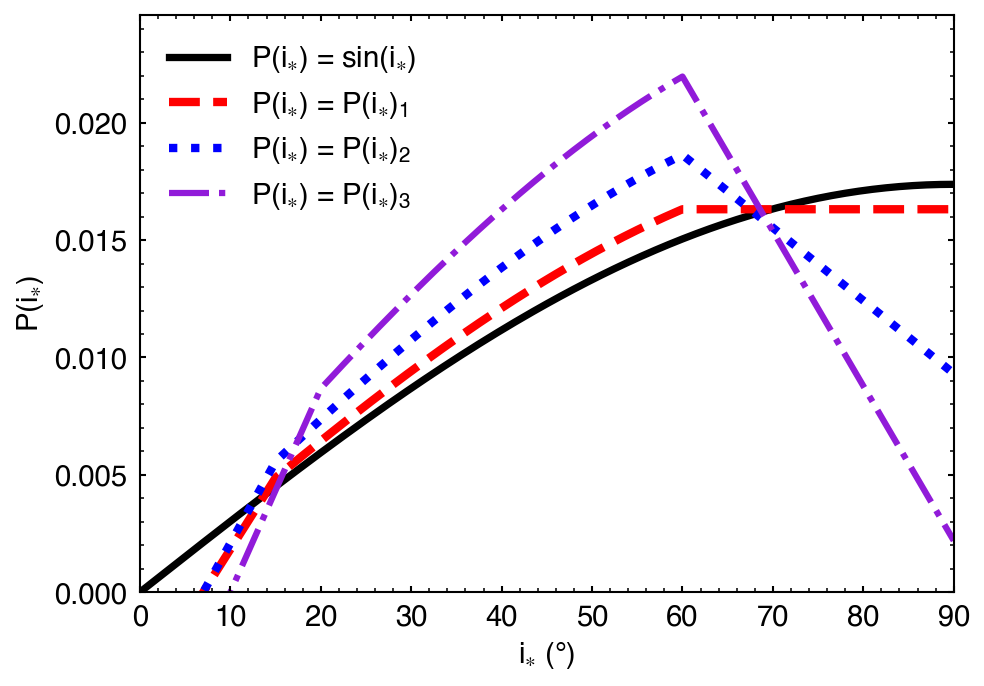

In [37]:

# Plot alternate selection functions for referee
i_deg = np.arange(0, 90 + 0.5, 0.5)
plot_all_selection_functions(i_deg)


# Reading in Files

In [39]:
compute_new_posteriors = False

sampling_resolution = 'high'


skip_stassun = False
skip_only_stassun = False
skip_no_stassun = False

resolution_text = sampling_resolution + 'Res'

date_str = '2025-Mar-29'

print('\nUsing date_str = ' + date_str + '\n')

sample_filepath_adopted = primordial_disks_sample_directory + 'adopted_' + date_str + '.csv'
sample_filepath_adopted_nominal = primordial_disks_sample_directory + 'adopted_' + date_str + '_Nominal.csv'
sample_filepath_adopted1 = primordial_disks_sample_directory + 'adopted_' + date_str + '_Modified1.csv'
sample_filepath_adopted2 = primordial_disks_sample_directory + 'adopted_' + date_str + '_Modified2.csv'
sample_filepath_adopted3 = primordial_disks_sample_directory + 'adopted_' + date_str + '_Modified3.csv'
    
other_date_str = '2024-Dec-04'
sample_filepath_only_stassun = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_only_stassun_' + other_date_str + '.csv'
sample_filepath_no_stassun = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_no_stassun_' + other_date_str + '.csv'
sample_filepath_all = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_all_' + other_date_str + '.csv'



distribution_dir = primordial_disks_directory + 'Tables/Probability_Distributions/High_Final/'


hist_linecolor = '#2f0431'  # Histogram
zeroline_color = '#404040'  # veq - vsini
point_color = '#003366'   # veq - vsini
edge_color = '#005580'  # par vs. Delta i 
point_color_no_z = '#0086b3'  # par vs. Delta i 
kde_color = '#6fdcdc'




Using date_str = 2025-Mar-29



In [40]:
do_modified_istar = False
which_modified_prior = 3

which_targs = 'all'

if compute_new_posteriors == True:

     # ADOPTED
    if skip_stassun != True:
        df_adopted = compute_Deltai_and_data_table(df=raw_df, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='adopted', save_stuff=save_dists, plot_stuff=save_plots, modified_istar=do_modified_istar, selection=which_modified_prior)
        df_adopted.to_csv(sample_filepath_adopted, index=False)
        df_adopted = pd.read_csv(sample_filepath_adopted)

        df_adopted['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_adopted['vsini Unc'] = df_adopted['vsini Unc'].astype(float)

        df_adopted = df_adopted.sort_values('Simbad Name')
        df_adopted.loc[df_adopted['i star (deg)'] > 90., 'i star (deg)'] = 90.


    # NO STASSUN
    if skip_no_stassun != True:
        df_no_stassun = compute_Deltai_and_data_table(df=raw_df_no_stassun, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='no_stassun', save_stuff=save_dists, plot_stuff=False, modified_istar=do_modified_istar, selection=which_modified_prior)
        df_no_stassun.to_csv(sample_filepath_no_stassun, index=False)
        df_no_stassun = pd.read_csv(sample_filepath_no_stassun)

        df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_no_stassun['vsini Unc'] = df_no_stassun['vsini Unc'].astype(float)

        df_no_stassun = df_no_stassun.sort_values('Simbad Name')
        df_no_stassun.loc[df_no_stassun['i star (deg)'] > 90., 'i star (deg)'] = 90.


    # ONLY STASSUN
    if skip_only_stassun != True:
        df_stassun_only = compute_Deltai_and_data_table(df=raw_df_stassun_only, targs=which_targs, resolution=sampling_resolution, dist_dir=distribution_dir, which_radii='only_stassun', save_stuff=save_dists, plot_stuff=False, modified_istar=do_modified_istar, selection=which_modified_prior)
        df_stassun_only.to_csv(sample_filepath_only_stassun, index=False)
        df_stassun_only = pd.read_csv(sample_filepath_only_stassun)

        df_stassun_only['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_stassun_only['vsini Unc'] = df_stassun_only['vsini Unc'].astype(float)

        df_stassun_only = df_stassun_only.sort_values('Simbad Name')
        df_stassun_only.loc[df_stassun_only['i star (deg)'] > 90., 'i star (deg)'] = 90.


else:

    print('OPENING FILES...')

    # ADOPTED
    if skip_stassun != True:
        print(sample_filepath_adopted)
        df_adopted = pd.read_csv(sample_filepath_adopted)
        df_adopted['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_adopted['vsini Unc'] = df_adopted['vsini Unc'].astype(float)

        df_adopted = df_adopted.sort_values('Simbad Name')
        df_adopted.loc[df_adopted['i star (deg)'] > 90., 'i star (deg)'] = 90.


    # NO STASSUN
    if skip_no_stassun != True:
        print(sample_filepath_no_stassun)
        df_no_stassun = pd.read_csv(sample_filepath_no_stassun)
        df_no_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_no_stassun['vsini Unc'] = df_no_stassun['vsini Unc'].astype(float)

        df_no_stassun = df_no_stassun.sort_values('Simbad Name')
        df_no_stassun.loc[df_no_stassun['i star (deg)'] > 90., 'i star (deg)'] = 90.


        # ONLY STASSUN 
    if skip_only_stassun != True:
        print(sample_filepath_only_stassun)
        df_stassun_only = pd.read_csv(sample_filepath_only_stassun)
        df_stassun_only['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
        df_stassun_only['vsini Unc'] = df_stassun_only['vsini Unc'].astype(float)

        df_stassun_only = df_stassun_only.sort_values('Simbad Name')
        df_stassun_only.loc[df_stassun_only['i star (deg)'] > 90., 'i star (deg)'] = 90.



OPENING FILES...
/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/adopted_2025-Mar-29.csv
/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/adopted_highRes_no_stassun_2024-Dec-04.csv
/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Condensed_Sample_By_Date/adopted_highRes_only_stassun_2024-Dec-04.csv


/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_87444/1697789329.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adopted['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_87444/1697789329.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

### Histogram of Sample System Properties

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


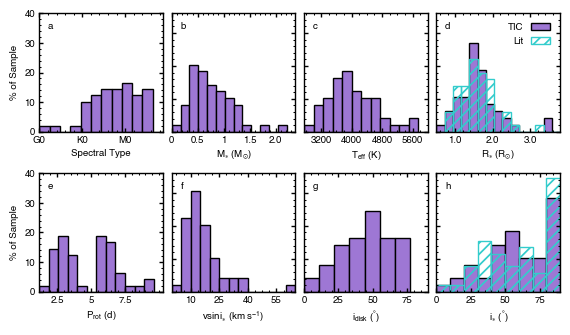

In [44]:
font_size = 7

hist_color = '#9e77d4'  # '#ad33ff'  # '#b30059'  # '#ad33ff'  # '#958bda'  # '#669999'
hist_ylabel = r'% of Sample'
hist_linecolor = '#000000'  # '#2f0431'

if do_modified_istar == True:
    istar_binwidth = 10
else:
    istar_binwidth = 10

ED_Figure_1_Source_Data = {}

letter_strings = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
letter_i = 0

hists_to_create = {'SpType': {'Title': 'SpType',
                                      'Label': 'Spectral Type',
                                      'Save Text': 'SpType',
                                      'Bin Width': 0.24,
                                      'Bin Range': [3.0, 5.75]  # [3.80, 5.65]
                                      },
                            'Mstar (Msun)': {'Title': 'Stellar Mass',
                                            'Label': r'M$_{\ast}$ (M$_{\odot}$)',
                                            'Save Text': 'Mstar_distribution_stassun_',
                                            'Bin Width': 0.17,
                                            'Bin Range': [0, 2.25]
                                            },
                            'Teff (K)': {'Title': r'Stellar $T_{\mathrm{eff}}$',
                                            'Label': r'T$_{eff}$ (K)',
                                            'Save Text': 'Teff_distribution_stassun_',
                                            'Bin Width': 250,
                                            'Bin Range': [2750, 6000]  # [2750, 5250]
                                            },
                            'Rstar (Rsun)': {'Title': 'Stellar Radius',
                                            'Label': r'R$_{\ast}$ (R$_{\odot}$)',
                                            'Save Text': 'radii_distribution_stassun_',
                                            'Bin Width': 0.22,
                                            'Bin Range': [0.50, 3.80]  # [0.30, 3.60]
                                            },
                            'Prot (d)': {'Title': 'Rotation Period',
                                        'Label': r'P$_{rot}$ (d)',
                                        'Save Text': 'Prot_distribution_stassun_',
                                        'Bin Width': 0.70,
                                        'Bin Range': [1.2, 9.8]
                                        },
                            'vsini (km/s)': {'Title': r'Stellar $v\mathrm{sin}i_{\ast}$',
                                            'Label': r'vsini$_{\ast}$ (km s$^{-1}$)',
                                            'Save Text': 'vsini_distribution_stassun_',
                                            'Bin Width': 5,
                                            'Bin Range': [0, 64]  # [3, 38]
                                            },
                            'i disk (deg)': {'Title': 'Disk Incl',
                                               'Label': r'i$_{disk}$ ($^\degree$)',
                                               'Save Text': 'iDisk_distribution_stassun_',
                                               'Bin Width': 11,
                                               'Bin Range': [0, 90]
                                               },
                            'i star (deg)': {'Title': 'Stellar Incl',
                                            'Label': r'i$_{\ast}$ ($^\degree$)',
                                            'Save Text': 'iStar_distribution_stassun_',
                                            'Bin Width': istar_binwidth,
                                            'Bin Range': [0, 90]
                                            },
                           }


grid_width = 4
grid_height = 2


fig_width = 14 * 0.40
fig_height = 8 * 0.40

fig = plt.figure(figsize=(fig_width, fig_height))
cell_width_ratios = [1, 1, 1, 1]
gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=cell_width_ratios)
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height ) for jj in range(grid_width )]
ax_keys = list(hists_to_create.keys())

plot_lit_flag = False

for ax_i, ax in enumerate(axes):

    ax.minorticks_on()
    ax.set_rasterized(False)

    bin_width = hists_to_create[ax_keys[ax_i]]['Bin Width']
    hist_bins = np.arange(hists_to_create[ax_keys[ax_i]]['Bin Range'][0], hists_to_create[ax_keys[ax_i]]['Bin Range'][1] + bin_width, bin_width)


    plot_values = []
    for value in df_adopted[ax_keys[ax_i]].values:
        if type(value) == str:
            if '[' in value:
                val1 = float(value.replace('[', '').replace(']', '').split(',')[0])
                val2 = float(value.replace('[', '').replace(']', '').split(',')[1])
                value = np.mean([val1, val2])
                val_err = abs(value - val1)
        plot_values.append(float(value))


    bin_vals_stassun, bin_edges = np.histogram(plot_values, bins=hist_bins)
    bin_vals_percent_stassun = (bin_vals_stassun / sum(bin_vals_stassun))*100


    ax.bar(bin_edges[:-1] + 0.5*bin_width, bin_vals_percent_stassun, edgecolor=hist_linecolor, color=hist_color, lw=1, width=bin_width, align='center', label='TIC')

    bin_edge_list = list(bin_edges[:-1] + 0.5*bin_width)
    bin_vals_list = list(bin_vals_percent_stassun)

    while len(bin_vals_list) < 15:
        bin_edge_list.append(float('Nan'))
        bin_vals_list.append(float('Nan'))

    ED_Figure_1_Source_Data[letter_strings[letter_i] + ' ' + ax_keys[ax_i]] = bin_edge_list
    ED_Figure_1_Source_Data[letter_strings[letter_i] + ' Fraction of Sample'] = bin_vals_list


    if ((ax_keys[ax_i] == 'Rstar (Rsun)') or (ax_keys[ax_i] == 'i star (deg)')) and (skip_no_stassun != True):
        mpl.rcParams['hatch.linewidth'] = 1.25
        bin_vals_lit, bin_edges = np.histogram(df_no_stassun[ax_keys[ax_i]].values, bins=hist_bins)
        bin_vals_percent_lit = (bin_vals_lit / sum(bin_vals_lit)) * 100
        ax.bar(bin_edges[:-1] + 0.5*bin_width , bin_vals_percent_lit, hatch='///', edgecolor='#33cccc', color='None', lw=1, width=bin_width, align='center', label='Lit')
        if ax_keys[ax_i] == 'Rstar (Rsun)':
            ax.legend(loc='upper right', prop={'size': font_size}, ncol=1, markerfirst=False, bbox_to_anchor=(0, 0, 1, 1))
        plot_lit_flag = True
        
    if (ax_keys[ax_i] == 'i disk (deg)') or (ax_keys[ax_i] == 'i star (deg)'):
        xmin, xmax = 0, 90
    else:
        xmin, xmax = min(hist_bins), max(hist_bins)


    ymin, ymax = 0, 36

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ax.set_xlabel(hists_to_create[ax_keys[ax_i]]['Label'], fontsize=font_size, weight='light', labelpad=3)
    if np.mod(ax_i, grid_width ) == 0:
        ax.set_ylabel(hist_ylabel, fontsize=font_size, weight='light', labelpad=4)
        ytick_diff = 10
        ytickvals = [int(ytickval) for ytickval in np.arange(ymin, ymax + ytick_diff, ytick_diff)]
        ax.set_yticks(ytickvals)
        ax.set_yticklabels(ytickvals, fontsize=font_size, weight='light')
    else:
        ax.set_yticklabels([])


    if ax_keys[ax_i] == 'SpType':
        sptype_designations = {'2.70': 'F7.5',
                               '3.00': 'G0',
                               '3.25': 'G2.5',
                               '3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,1) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=font_size, weight='light')

    if ax_keys[ax_i] == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if ax_keys[ax_i] == 'Rstar (Rsun)':
        xtickvals = [1.0, 2.0, 3.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if ax_keys[ax_i] == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if (ax_keys[ax_i] == 'i disk (deg)') or (ax_keys[ax_i] == 'i star (deg)'):
        # xtickvals = [0, 30, 60]
        xtickvals = [0, 25, 50, 75]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')
        

    if ax_keys[ax_i] == 'vsini (km/s)':
        xtickvals = [10, 25, 40, 55]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if ax_keys[ax_i] == 'Teff (K)':
        xtickvals = [3200, 4000, 4800, 5600]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    # if letter_strings[letter_i] == 'h':
    #     ax.text(0.82, 0.85, letter_strings[letter_i], horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, weight='bold', transform=ax.transAxes)
    # else:
    #     ax.text(0.88, 0.85, letter_strings[letter_i], horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, weight='bold', transform=ax.transAxes)
    
    ax.text(0.07, 0.85, letter_strings[letter_i], horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, weight='bold', transform=ax.transAxes)


    # Make sure line thicknesses meet journal standards
    spine_linewidth = 1.0
    minor_linewidth = 0.75
    major_linewidth = 1.0
    minor_linelength = 1.75
    major_linelength = 3.0
    for spine in ax.spines.values():
        spine.set_linewidth(spine_linewidth)

    # Set tick properties
    ax.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, pad=3.0, labelsize=font_size)
    ax.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=3.0, labelsize=font_size)
    

    letter_i += 1

# fig.subplots_adjust(left=0.07, bottom=0.12, right=0.99, top=0.93, wspace=0.08, hspace=0.50)
fig.subplots_adjust(left=0.06, bottom=0.11, right=0.99, top=0.98, wspace=0.07, hspace=0.35)


nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
save_string = 'Extended_Data_Figure_1.pdf'
fig.savefig(nature_figures_directory + save_string, dpi=300)


nature_figures_directory2 = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Figures_and_Tables/'
save_string2 = 'Biddle_EDfig1.pdf'
fig.savefig(nature_figures_directory2 + save_string2, dpi=300)





ED_Figure_1_Source_Data_df = pd.DataFrame(ED_Figure_1_Source_Data)
ED_Figure_1_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_1.csv', index=False)



plt.show()
plt.close()



### Checking probability of high inclination stars and checking if it has anything to do with vsini, for example


In [48]:
if (skip_only_stassun != True) and (skip_no_stassun != True):

    discrepant_veq_minus_vsini_list = []
    no_TIC_available_list = []

    TIC_radii_of_discrepant_targets = []
    TIC_radii_err_of_discrepant_targets = []
    vsini_of_discrepant_targets = []
    vsini_err_of_discrepant_targets = []
    Prot_of_discrepant_targets = []
    Prot_err_of_discrepant_targets = []

    TIC_radii_of_NONdiscrepant_targets = []
    TIC_radii_err_of_NONdiscrepant_targets = []
    vsini_of_NONdiscrepant_targets = []
    vsini_err_of_NONdiscrepant_targets = []
    Prot_of_NONdiscrepant_targets = []
    Prot_err_of_NONdiscrepant_targets = []

    discrepant_dict = {'Target': [],
                    'Rstar TIC' : [],
                    'Rstar TIC Unc' : [],
                    'Rstar non-TIC' : [],
                    'Rstar non-TIC Unc' : [],
                    'Rstar TIC/non-TIC' : [],
                    'Veq' : [],
                    'Veq Unc' : [],
                    'vsini (km/s)' : [],
                    'vsini Unc' : [],
                    'Prot (d)' : [],
                    'Prot Unc' : [],
                    }
    non_discrepant_dict = {'Target': [],
                    'Rstar TIC' : [],
                    'Rstar TIC Unc' : [],
                    'Rstar non-TIC' : [],
                    'Rstar non-TIC Unc' : [],
                    'Rstar TIC/non-TIC' : [],
                    'Veq' : [],
                    'Veq Unc' : [],
                    'vsini (km/s)' : [],
                    'vsini Unc' : [],
                    'Prot (d)' : [],
                    'Prot Unc' : [],
                    }

    for target_name_i, target_name in enumerate(df_adopted['Simbad Name'].values):

        if target_name in df_stassun_only['Simbad Name'].values:

            temp_df_stassun_only = df_stassun_only[df_stassun_only['Simbad Name'] == target_name]
            temp_df_no_stassun = df_no_stassun[df_no_stassun['Simbad Name'] == target_name]
            
            veq_minus_vsini = temp_df_stassun_only['Veq'].values[0] - temp_df_stassun_only['vsini (km/s)'].values[0]
            veqs_minus_vsinis_err = np.sqrt(temp_df_stassun_only['Veq Unc'].values[0]**2 + temp_df_stassun_only['vsini Unc'].values[0]**2)


            if veq_minus_vsini + veqs_minus_vsinis_err < 0:
                discrepant_dict['Target'].append(target_name)
                discrepant_dict['Rstar TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0])
                discrepant_dict['Rstar TIC Unc'].append(temp_df_stassun_only['Rstar Unc'].values[0])
                discrepant_dict['Rstar non-TIC'].append(temp_df_no_stassun['Rstar (Rsun)'].values[0])
                discrepant_dict['Rstar non-TIC Unc'].append(temp_df_no_stassun['Rstar Unc'].values[0])
                discrepant_dict['Rstar TIC/non-TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0]/temp_df_no_stassun['Rstar (Rsun)'].values[0])
                discrepant_dict['Veq'].append(temp_df_stassun_only['Veq'].values[0])
                discrepant_dict['Veq Unc'].append(temp_df_stassun_only['Veq Unc'].values[0])
                discrepant_dict['vsini (km/s)'].append(temp_df_stassun_only['vsini (km/s)'].values[0])
                discrepant_dict['vsini Unc'].append(temp_df_stassun_only['vsini Unc'].values[0])
                discrepant_dict['Prot (d)'].append(temp_df_stassun_only['Prot (d)'].values[0])
                discrepant_dict['Prot Unc'].append(temp_df_stassun_only['Prot Unc'].values[0])
            else:
                non_discrepant_dict['Target'].append(target_name)
                non_discrepant_dict['Rstar TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Rstar TIC Unc'].append(temp_df_stassun_only['Rstar Unc'].values[0])
                non_discrepant_dict['Rstar non-TIC'].append(temp_df_no_stassun['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Rstar non-TIC Unc'].append(temp_df_no_stassun['Rstar Unc'].values[0])
                non_discrepant_dict['Rstar TIC/non-TIC'].append(temp_df_stassun_only['Rstar (Rsun)'].values[0]/temp_df_no_stassun['Rstar (Rsun)'].values[0])
                non_discrepant_dict['Veq'].append(temp_df_stassun_only['Veq'].values[0])
                non_discrepant_dict['Veq Unc'].append(temp_df_stassun_only['Veq Unc'].values[0])
                non_discrepant_dict['vsini (km/s)'].append(temp_df_stassun_only['vsini (km/s)'].values[0])
                non_discrepant_dict['vsini Unc'].append(temp_df_stassun_only['vsini Unc'].values[0])
                non_discrepant_dict['Prot (d)'].append(temp_df_stassun_only['Prot (d)'].values[0])
                non_discrepant_dict['Prot Unc'].append(temp_df_stassun_only['Prot Unc'].values[0])
        else:
            no_TIC_available_list.append(target_name)

    discrepant_df = pd.DataFrame(discrepant_dict)
    non_discrepant_df = pd.DataFrame(non_discrepant_dict)
    print('Targets with discrepant veq - vsini: ')
    print(discrepant_df['Target'].values, '\n')
    print('Targets with no TIC radius available: ')
    print(no_TIC_available_list, '\n')

    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    print('Average Discrepant Rstar TIC/non-TIC: {:.3f}'.format(np.mean(discrepant_df['Rstar TIC/non-TIC'].values)))
    print('Average Non-discrepant Rstar TIC/non-TIC: {:.3f}'.format(np.mean(non_discrepant_df['Rstar TIC/non-TIC'].values)))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_percentage_offset = 100 * (1 - np.mean(discrepant_df['Rstar TIC/non-TIC'].values))
    non_discrepant_percentage_offset = 100 * (1 - np.mean(non_discrepant_df['Rstar TIC/non-TIC'].values))
    print('The TIC radii of the stars in this subset are on average {:.1f}[percent] lower than the mean of all non-TIC radii compiled for these same stars,'.format(discrepant_percentage_offset))
    print('whereas the rest of the objects in the sample that do not yield discrepant [veq] and [vsini] values are on average only {:.1f}[percent] lower than the mean of their non-TIC counterparts.'.format(non_discrepant_percentage_offset))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_average_period, discrepant_average_period_err = np.mean(discrepant_df['Prot (d)'].values), np.std(discrepant_df['Prot (d)'].values, ddof=1)
    non_discrepant_average_period, non_discrepant_average_period_err = np.mean(non_discrepant_df['Prot (d)'].values), np.std(non_discrepant_df['Prot (d)'].values, ddof=1)
    print('Average Discrepant Prot: {:.2f} +/- {:.2f}'.format(discrepant_average_period, discrepant_average_period_err))
    print('Average Non-discrepant Prot: {:.2f} +/- {:.2f}'.format(non_discrepant_average_period, non_discrepant_average_period_err))
    print('Average Discrepant/Non-discrepant Prot: {:.2f}'.format(discrepant_average_period/non_discrepant_average_period))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')
    discrepant_average_vsini, discrepant_average_vsini_err = np.mean(discrepant_df['vsini (km/s)'].values[discrepant_df['vsini Unc'].values > 0]), np.std(discrepant_df['vsini (km/s)'].values[discrepant_df['vsini Unc'].values > 0], ddof=1)
    non_discrepant_average_vsini, non_discrepant_average_vsini_err = np.mean(non_discrepant_df['vsini (km/s)'].values[non_discrepant_df['vsini Unc'].values > 0]), np.std(non_discrepant_df['vsini (km/s)'].values[non_discrepant_df['vsini Unc'].values > 0], ddof=1)
    print('Average Discrepant vsini: {:.2f} +/- {:.2f}'.format(discrepant_average_vsini, discrepant_average_vsini_err))
    print('Average Non-discrepant vsini: {:.2f} +/- {:.2f}'.format(non_discrepant_average_vsini, non_discrepant_average_vsini_err))
    print('Average Discrepant/Non-discrepant vsini: {:.2f}'.format(discrepant_average_vsini/non_discrepant_average_vsini))
    print('©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©')


Targets with discrepant veq - vsini: 
['2MASS J04202555+2700355' '2MASS J04360131+1726120' 'AA Tau' 'DoAr 25'
 'FT Tau' 'IQ Tau' 'MHO 6' 'Sz 73' 'T Cha' 'WSB 52'] 

Targets with no TIC radius available: 
['2MASS J04334465+2615005', 'DE Tau', 'Elias 2-24', 'WSB 63'] 

©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
Average Discrepant Rstar TIC/non-TIC: 0.646
Average Non-discrepant Rstar TIC/non-TIC: 0.961
©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
The TIC radii of the stars in this subset are on average 35.4[percent] lower than the mean of all non-TIC radii compiled for these same stars,
whereas the rest of the objects in the sample that do not yield discrepant [veq] and [vsini] values are on average only 3.9[percent] lower than the mean of their non-TIC counterparts.
©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©©
Average Discrepant Prot: 4.73 +/- 2.70
Average Non-discrepant Prot: 4.67 +/- 2.03
Average Discrepant/Non-discrepant Prot: 1.01
©©©©©©©©©

# Plot HBM Results and Compute the KDE

In [49]:

do_HBM = True

if do_HBM == True:
    HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-Nov-10/Final_HBM_Files/'


    Delta_i_Rayleigh_logUniformPrior_file = HBM_directory + 'Delta_inclination_rayleigh_log-uniform.h5'
    Delta_i_Rayleigh_gaussianPrior_file = HBM_directory + 'Delta_inclination_rayleigh_gaussian.h5'
    Delta_i_Gaussian_logUniformPrior_file = HBM_directory + 'Delta_inclination_gaussian_log-uniform.h5'
    Delta_i_Gaussian_gaussianPrior_file = HBM_directory + 'Delta_inclination_gaussian_gaussian.h5'
    Delta_i_Truncated_Gaussian_UniformPrior_file = HBM_directory + 'Delta_inclination_truncated_gaussian-uniform.h5'

    R_lU_label = r'Rayleigh (log-U Pr)'
    R_G_label = r'Rayleigh (TG Pr)'
    G_lU_label = r'Gaussian (log-U Pr)'
    G_G_label = r'Gaussian (TG Pr)'
    TG_U_label = r'Truncated Gaussian (U Pr)'

    Delta_i_HBM_files = {R_lU_label: {'File Path': Delta_i_Rayleigh_logUniformPrior_file,
                                    },
                        R_G_label: {'File Path': Delta_i_Rayleigh_gaussianPrior_file,
                                    },
                        G_lU_label: {'File Path': Delta_i_Gaussian_logUniformPrior_file,
                                    },
                        G_G_label: {'File Path': Delta_i_Gaussian_gaussianPrior_file,
                                    },
                        TG_U_label: {'File Path': Delta_i_Truncated_Gaussian_UniformPrior_file,
                                    },
                        }

In [52]:
if do_HBM == True:
    # ------------------ DETERMINE X_GRID ------------------ #
    Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
    posterior_i_values = Posteriors['i (deg)'].values
    x_grid = np.array(posterior_i_values).reshape(-1, 1)

    reverse_posterior_i_values = -posterior_i_values[::-1][:-1]
    all_posterior_i_values = np.concatenate((np.array(reverse_posterior_i_values), np.array(posterior_i_values)))
    x_grid_all = np.array(all_posterior_i_values).reshape(-1, 1)

    x_grid_plot = np.copy(posterior_i_values)
    ivals = np.arange(0, 90 + 0.1, 0.1)
    x_model = ivals/90.

    HBM_Samples = {}

    for HBM_key in list(Delta_i_HBM_files.keys()):
        print(HBM_key)
        
        with h5py.File(Delta_i_HBM_files[HBM_key]['File Path'], 'r') as file:
            data_accepted = file['/mcmc/accepted'][()]
            data_chain = file['/mcmc/chain'][()]
            data_logprob = file['/mcmc/log_prob'][()]
        
        data_accepted = [int(bep) for bep in data_accepted]

        accepted_models = []

        if 'Rayleigh ' in HBM_key:
            print('Data Chain Shape: ', data_chain.shape)
            accepted_chains = data_chain[data_accepted, :, 0]
            for chain_i in range(len(accepted_chains)):
                R_mean_par_1 = np.mean(accepted_chains[chain_i])
                model_profile = x_model/(np.mean(accepted_chains[chain_i])**2) * np.exp((-x_model**2)/(2*np.mean(accepted_chains[chain_i])**2))
                model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
                for beep_i in range(len(model_profile)):
                    accepted_models.append(model_profile)


        if 'Gaussian ' in HBM_key and 'Truncated' not in HBM_key:
            print('Data Chain Shape: ', data_chain.shape)
            random_chains_mu = data_chain[data_accepted, :, 0]
            random_chains_sigma = data_chain[data_accepted, :, 1]
            for chain_j in range(len(random_chains_mu)):
                random_draw_mu = np.mean(random_chains_mu[chain_j])
                random_draw_sigma = np.mean(random_chains_sigma[chain_j])
                model_profile = norm.pdf(x=x_model, loc=random_draw_mu, scale=random_draw_sigma)
                model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
                accepted_models.append(model_profile)


        if 'Gaussian ' in HBM_key and 'Truncated' in HBM_key:
            print('Data Chain Shape: ', data_chain.shape)
            random_chains_mu = data_chain[data_accepted, :, 0]
            print(random_chains_mu)
            random_chains_sigma = data_chain[data_accepted, :, 1]
            print(random_chains_sigma)
            for chain_j in range(len(random_chains_mu)):
                random_draw_mu = -615
                random_draw_sigma = 9.5
                lower_bound =( 0 - random_draw_mu ) / random_draw_sigma
                upper_bound = (1 - random_draw_mu ) / random_draw_sigma
                model_profile = truncnorm.pdf(x=x_model, a=lower_bound, b=upper_bound, loc=random_draw_mu, scale=random_draw_sigma)
                model_profile = model_profile/(sum(model_profile) * np.diff(ivals)[0])
                accepted_models.append(model_profile)

        profile_16 = np.percentile(accepted_models, 16, axis=0)
        mean_profile = np.percentile(accepted_models, 50, axis=0)
        profile_84 = np.percentile(accepted_models, 84, axis=0)
        
        Delta_i_HBM_files[HBM_key]['Model Profile'] = mean_profile
        Delta_i_HBM_files[HBM_key]['Model Profile 16'] = profile_16
        Delta_i_HBM_files[HBM_key]['Model Profile 84'] = profile_84

        if 'lU Prior' in HBM_key:
            model_linestyle = '-'
        if 'G Prior' in HBM_key:
            model_linestyle = '--'


Rayleigh (log-U Pr)
Data Chain Shape:  (60000, 80, 1)
Rayleigh (TG Pr)
Data Chain Shape:  (60000, 80, 1)
Gaussian (log-U Pr)
Data Chain Shape:  (60000, 80, 2)
Gaussian (TG Pr)
Data Chain Shape:  (30000, 80, 2)
Truncated Gaussian (U Pr)
Data Chain Shape:  (500, 100, 2)
[[-878.36232012 -165.86262632 -311.03174187 ... -399.32849736
  -930.43145396 -960.93887371]
 [-253.54893887 -267.83457771 -246.26976247 ... -577.96816813
  -898.36564747 -943.74738113]
 [-436.30433254  -55.05049942 -394.59589448 ... -475.45036849
  -940.93783552 -883.29408223]
 ...
 [-810.56827398 -159.92079483 -939.80360196 ... -416.49644174
  -246.88764368 -888.47354998]
 [-253.54893887 -217.37397479 -246.26976247 ... -568.07650321
  -898.36564747 -943.74738113]
 [-255.71463826  -55.05049942 -386.20469343 ... -375.17178533
  -976.60076819 -838.42906506]]
[[12.52358456  4.83218655  6.83064125 ...  7.78373655 12.12262398
  12.03775354]
 [ 6.77537281  5.96766785  5.51720274 ...  9.99344956 12.30937728
  11.93330745]
 [ 8.

In [53]:
# ------------------ DETERMINE X_GRID ------------------ #
Posteriors = pd.read_csv(distribution_dir + 'Prob_CXTau.csv')
deltai_values = Posteriors['i (deg)'].values

x_grid = np.array(deltai_values).reshape(-1, 1)

reverse_deltai_values = -deltai_values[::-1][:-1]
all_deltai_values = np.concatenate((np.array(reverse_deltai_values), np.array(deltai_values)))
x_grid_all = np.array(all_deltai_values).reshape(-1, 1)

x_grid_plot = np.copy(deltai_values)


track_posteriors = []

# Set savefile path to save kde so you don't have to rerun everything
KDE_filepath_for_5x5_grid = primordial_disks_sample_directory + 'KDE_' + resolution_text + '_Rshift1_Pshift1_' + date_str + '.csv'
KDE_savefile_path = primordial_disks_sample_directory + 'KDE_' + date_str + '.csv'

# Set number of random draws from individual probability distributions
kde_n_draws = int(5e2)  #  int(5e3)

# Determine kernel bandwidth based on the average difference of 1sig confidence limits of Deltai to the mean
mean_Deltai = (df_adopted['disk diff +Unc'].values + df_adopted['disk diff -Unc'].values) / 2.
deviation_Deltai = abs(df_adopted['disk diff +Unc'].values - mean_Deltai)
band_width = np.mean(deviation_Deltai)
print('KDE Bandwidth = ', band_width)


# If first time, set to true
compute_new_KDE = False

if compute_new_KDE == True:

    # ------------------ COMPUTE KDE ------------------ #
    data_for_kde = []
    for targetnum in range(len(df_adopted['Simbad Name'].values)):

        target_str = df_adopted['Simbad Name'].values[targetnum].replace(' ', '')
        if '/' in df_adopted['Simbad Name'].values[targetnum]:
            target_str = target_str.replace('/', '-')

        Posteriors = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
        P_Delta_i_target = np.array(Posteriors['P(Delta i | d)'].values)

        track_posteriors.append(P_Delta_i_target)

        data_for_kde.extend(choices(deltai_values, P_Delta_i_target, k=kde_n_draws))

    data_for_kde_reshaped = np.array(data_for_kde).reshape(-1, 1)

    kde = KernelDensity(kernel='gaussian', bandwidth=band_width).fit(data_for_kde_reshaped)
    log_density = kde.score_samples(x_grid_all)
    density_estimation = np.array(np.exp(log_density))
    density_estimation_mirrored = density_estimation[::-1]
    density_estimation_total = density_estimation + density_estimation_mirrored

    KDE_dict = {'all_deltai_values': all_deltai_values,
                'density_estimation': density_estimation,
                'density_estimation_mirrored': density_estimation_mirrored,
                'density_estimation_total': density_estimation_total,
                'kde_n_draws': [kde_n_draws]*len(density_estimation),
                'band_width': [band_width]*len(density_estimation),
                }
    KDE_df = pd.DataFrame(KDE_dict)
    KDE_df.to_csv(KDE_savefile_path, index=False)
    KDE_df.to_csv(KDE_filepath_for_5x5_grid, index=False)
else:
    # ------------------ READ IN KDE ------------------ #
    KDE_df = pd.read_csv(KDE_savefile_path)
    density_estimation = KDE_df['density_estimation'].values
    density_estimation_total = KDE_df['density_estimation_total'].values
    kde_n_draws = KDE_df['kde_n_draws'].values[0]
    band_width = KDE_df['band_width'].values[0]
    print('KDE Bandwidth = ', band_width)


# Accept parameter space > 0
density_estimation_total_positive_x = density_estimation_total[all_posterior_i_values >= 0]

dx = np.diff(x_grid_plot)[0]
print('dx: ', dx)

# Renormalize
density_estimation_total_positive_x = density_estimation_total_positive_x / (sum(density_estimation_total_positive_x) * dx)

KDE Bandwidth =  5.341534332499999
KDE Bandwidth =  5.341534332499999
dx:  0.001


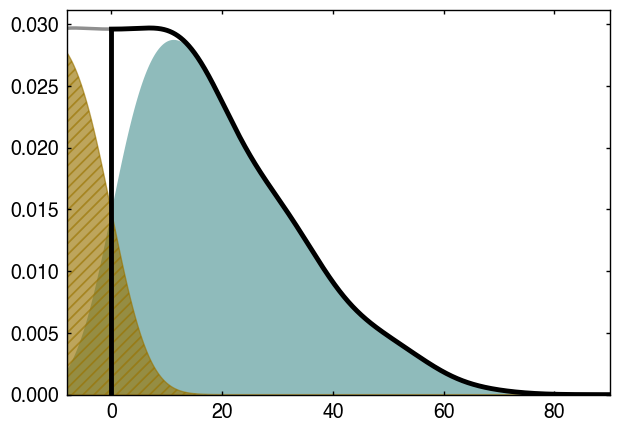

Area under KDE (Trapz):  1.0 ,  Close enough to 1:  True


In [54]:
# Check that you did the edge correction right

density_estimation_uncorrected = density_estimation[all_deltai_values >= 0]
density_estimation_uncorrected = density_estimation_uncorrected / (sum(density_estimation_uncorrected) * dx)

plot_mirror_test = True
if plot_mirror_test == True:

    plt.fill_between(all_deltai_values, density_estimation, alpha=0.44, zorder=0)
    plt.fill_between(all_deltai_values[::-1], density_estimation, color='#997300', hatch='///', alpha=0.64, zorder=0)
    plt.plot(all_deltai_values, density_estimation_total, color='#000000', lw=2.5, alpha=0.44, zorder=1)
    plt.plot(deltai_values, density_estimation_total_positive_x, color='#000000', lw=3.5, alpha=1, zorder=1)
    plt.plot([0, 0], [0, density_estimation_total_positive_x[0]], color='#000000', lw=3.5, alpha=1, zorder=1)
    plt.xlim(-8, max(all_deltai_values))
    plt.ylim(0, 1.05*max(density_estimation_total_positive_x))
    plt.show()
    plt.close()

    total_area_trapz = np.trapz(density_estimation_total_positive_x, deltai_values)
    closeness_trapz = np.isclose(total_area_trapz, 1, atol=1e-2)
    print('Area under KDE (Trapz): ', round(total_area_trapz, 4), ',  Close enough to 1: ', closeness_trapz)


# vsini - veq plot

-3.164995619999999 1.2897536951118462 -2.453953519959122


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


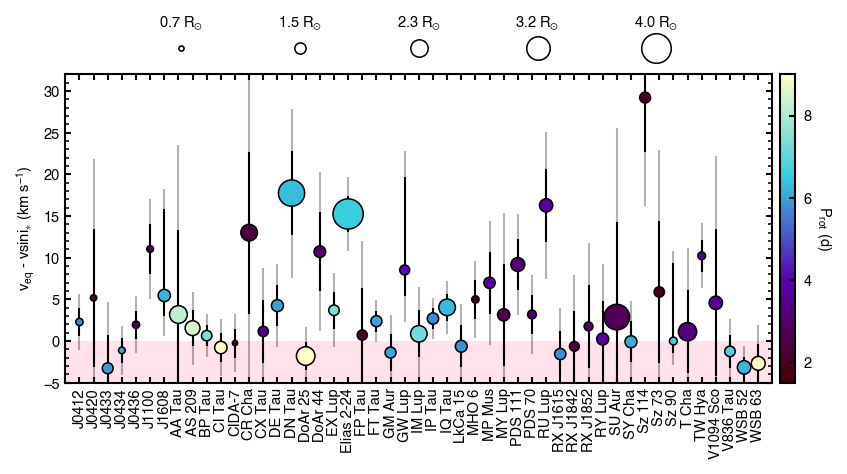

In [55]:
x_spacing = 1

point_size = 8

ymin, ymax = -5, 32 

z_axis = 'Prot (d)'  

if z_axis == 'disk diff':
    z_min, z_max = 0, 60 
    z_label = r'$\Delta$ i ($^\degree$)'
    cbar_ticks = [0, 10, 20, 30, 40, 50, 60]
    cbar_extend = 'neither'
if z_axis == 'Rstar (Rsun)':
    z_min, z_max = 0.50, 2.5
    z_label = r'R$_{\ast}$ (R$_{\odot}$)'
    cbar_ticks = [0.5, 1.0, 1.5, 2.0, 2.5]
    cbar_extend = 'max'
if z_axis == 'Prot (d)':
    z_min, z_max = 1.5, 9  # 10
    z_label = r'P$_{rot}$ (d)'
    if z_max < 10:
        cbar_ticks = [2, 4, 6, 8]
    else:
        cbar_ticks = [2, 4, 6, 8, 10]
    cbar_extend = 'neither'

parameter_z_norm = plt.Normalize(z_min, z_max)


scaling_factor = 2.0
max_Rstar = 4.0
s_axis = 'Rstar (Rsun)'
if s_axis == 'Rstar (Rsun)':
    point_sizes = []
    for Rstar_i in range(len(df_adopted[s_axis].values)):
        Rstar = df_adopted[s_axis].values[Rstar_i]
        point_sizes.append(np.pi*(scaling_factor * Rstar)**2)

benchmark_radii = np.linspace(0.7, max_Rstar, 5)
benchmark_sizes = np.pi*((scaling_factor * benchmark_radii))**2



ED_Figure_2_Source_Data = {}




# ------------------------- STASSUN RADII -------------------------- # 

vsinis_stassun = np.array(df_adopted['vsini (km/s)'].values)
vsini_errs_stassun = np.array(df_adopted['vsini Unc'].values)
veqs_stassun = np.array(df_adopted['Veq'].values)
veq_errs_stassun = np.array(df_adopted['Veq Unc'].values)
masses_stassun = np.array(df_adopted['Mstar (Msun)'].values)
masses_err_stassun = np.array(df_adopted['Mstar Unc'].values)
radii_stassun = np.array(df_adopted['Rstar (Rsun)'].values)
radii_err_stassun = np.array(df_adopted['Rstar Unc'].values)
Prots_stassun = np.array(df_adopted['Prot (d)'].values)
Prots_err_stassun = np.array(df_adopted['Prot (d)'].values)

vlimit_stassun = np.sqrt((6.674e-20 * masses_stassun * 1.989e30) / (radii_stassun * 6.96e5))

veqs_minus_vsinis_stassun = veqs_stassun - vsinis_stassun
veqs_minus_vsinis_err_stassun_1sig_p = []
veqs_minus_vsinis_err_stassun_1sig_m = []
veqs_minus_vsinis_err_stassun_2sig_p = []
veqs_minus_vsinis_err_stassun_2sig_m = []
for vsini_err_i in range(len(vsinis_stassun)):
    if float(vsini_errs_stassun[vsini_err_i]) == 0:
        veqs_minus_vsinis_err_stassun_1sig_p.append(vsinis_stassun[vsini_err_i] + np.sqrt(veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_1sig_m.append(np.sqrt(veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_2sig_p.append(vsinis_stassun[vsini_err_i] + 2 * np.sqrt(veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_2sig_m.append(2 * np.sqrt(veq_errs_stassun[vsini_err_i]**2))
    else:
        veqs_minus_vsinis_err_stassun_1sig_p.append(np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_1sig_m.append(np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_2sig_p.append(2 * np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))
        veqs_minus_vsinis_err_stassun_2sig_m.append(2 * np.sqrt(float(vsini_errs_stassun[vsini_err_i])**2 + veq_errs_stassun[vsini_err_i]**2))

x_array = np.arange(0, x_spacing*len(veqs_minus_vsinis_stassun), x_spacing)
benchmark_x_array = np.linspace(0.15*x_array[-1], 0.85*x_array[-1], len(benchmark_radii))



# colormap = choose_cmap('cyber grape', reverse_cmap=False)
colormap = choose_cmap('raspberry punch2', reverse_cmap=False)
point_colors = [colormap(parameter_z_norm(bep)) for bep in df_adopted[z_axis].values]






veq_vsini_figwidth = 5.5
veq_vsini_figheight = 3


fig4 = plt.figure(figsize=(veq_vsini_figwidth, veq_vsini_figheight), dpi=150)
ax = fig4.add_subplot(111)

ax.minorticks_on()
ax.set_rasterized(False)

ax.set_ylabel(r'v$_{eq}$ - vsini$_{\ast}$ (km s$^{-1}$)', fontsize=font_size, weight='light', labelpad=3)

where_ymin = np.where(veqs_minus_vsinis_stassun == min(veqs_minus_vsinis_stassun))[0]
where_ymax = np.where(veqs_minus_vsinis_stassun == max(veqs_minus_vsinis_stassun))[0]

xmin, xmax = min(x_array) - x_spacing, max(x_array) + x_spacing
# ymin, ymax =  min(veqs_minus_vsinis_stassun) - 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun)), max(veqs_minus_vsinis_stassun) + 0.15*(max(veqs_minus_vsinis_stassun) - min(veqs_minus_vsinis_stassun))


point_linewidth = 0.75
error_linewidth = 1.0

vsini_fill_color = '#ffd7e5'  # '#ece6ff'  # '#ffd7cb'  # '#ccffee'  # '#ffd7e5'
# ax.plot([xmin, xmax], [0, 0], linestyle=':', color=zeroline_color, lw=4, alpha=1., zorder=-3)
ax.fill_between([xmin, xmax], [ymin, ymin], color=vsini_fill_color, alpha=0.7, lw=0, zorder=-100)
if s_axis != 'None':
        ax.scatter(x_array, veqs_minus_vsinis_stassun, edgecolors='#000000', linewidth=point_linewidth, s=point_sizes, color=point_colors, linestyle='None')
else:
    ax.scatter(x_array, veqs_minus_vsinis_stassun, edgecolors='#000000', linewidth=point_linewidth, s=np.pi*point_size**2, color=point_colors, linestyle='None')
ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=[veqs_minus_vsinis_err_stassun_1sig_m, veqs_minus_vsinis_err_stassun_1sig_p], elinewidth=error_linewidth, linewidth=0, capsize=0, ecolor='#000000', capthick=1, zorder=-1)
ax.errorbar(x_array, veqs_minus_vsinis_stassun, yerr=[veqs_minus_vsinis_err_stassun_2sig_m, veqs_minus_vsinis_err_stassun_2sig_p], elinewidth=error_linewidth, linewidth=0, capsize=0, ecolor='#000000', capthick=1, alpha=0.3, zorder=-2)


for benchmark_i in range(len(benchmark_x_array)):
    ax.scatter([benchmark_x_array[benchmark_i]], [1.10*ymax], color='#ffffff', edgecolors='#000000', s=benchmark_sizes[benchmark_i], linewidth=point_linewidth, clip_on=False, zorder=100)
    ax.text(benchmark_x_array[benchmark_i], 1.19*ymax, str(round(benchmark_radii[benchmark_i], 1)) + r' R$_{\odot}$', horizontalalignment='center', fontsize=font_size, weight='light', verticalalignment='center', clip_on=False,)





# Make sure line thicknesses meet journal standards
spine_linewidth = 1.0
minor_linewidth = 0.75
major_linewidth = 1.0
minor_linelength = 1.7
major_linelength = 3.0
for spine in ax.spines.values():
    spine.set_linewidth(spine_linewidth)

ax.tick_params(which='minor', axis='x', length=0, width=0)
ax.tick_params(which='major', axis='x', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)
ax.tick_params(which='minor', axis='y', length=minor_linelength, width=minor_linewidth, pad=2.5, labelsize=font_size)
ax.tick_params(which='major', axis='y', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)



cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=parameter_z_norm, cmap=colormap), ax=ax, use_gridspec=True, shrink=1., fraction=0.05, pad=0.01, extend=cbar_extend)  # location='top', 
cbar.set_label(z_label, labelpad=10, rotation=270, fontsize=font_size, weight='light')
# cbar.minorticks_on()
cbar.set_ticks(cbar_ticks)
cbar_ticklabels = [str(cbar_tick) for cbar_tick in cbar_ticks]
cbar.set_ticklabels(cbar_ticklabels, fontsize=font_size, weight='light')
cbar.ax.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=4)



ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax) 

ax.set_xticks(x_array)
xlabels = []
xlabels_temp1 = df_adopted['Simbad Name'].values  # [targ_label.replace('2MASS ', '') for targ_label in df_adopted['Simbad Name'].values]
for xlabel_i in range(len(df_adopted['Simbad Name'].values)):
    if '2MASS' in df_adopted['Simbad Name'].values[xlabel_i]:
        xlabel_name = df_adopted['Simbad Name'].values[xlabel_i].split(' ')[-1][0:5]
    elif 'RX ' in df_adopted['Simbad Name'].values[xlabel_i]:
        xlabel_name = df_adopted['Simbad Name'].values[xlabel_i].split('-')[0][0:8]
    else:
        xlabel_name = df_adopted['Simbad Name'].values[xlabel_i]
    xlabels.append(xlabel_name)
    if df_adopted['Simbad Name'].values[xlabel_i] == 'WSB 52':
        print(veqs_minus_vsinis_stassun[xlabel_i], veqs_minus_vsinis_err_stassun_1sig_p[xlabel_i], veqs_minus_vsinis_stassun[xlabel_i]/veqs_minus_vsinis_err_stassun_1sig_p[xlabel_i])
xticklabels = ax.set_xticklabels(xlabels, fontsize=font_size, weight='light', rotation=90)

ED_Figure_2_Source_Data['Target'] = xlabels
ED_Figure_2_Source_Data['veq - vsini (km/s)'] = veqs_minus_vsinis_stassun
ED_Figure_2_Source_Data['veq - vsini +/- 1sigma'] = veqs_minus_vsinis_err_stassun_1sig_m
ED_Figure_2_Source_Data['veq - vsini +/- 2sigma'] = veqs_minus_vsinis_err_stassun_2sig_m


fig4.subplots_adjust(left=0.0662, bottom=0.175, right=0.978, top=0.86, wspace=0.025, hspace=0)

nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
save_string = 'Extended_Data_Figure_2.pdf'
fig4.savefig(nature_figures_directory + save_string, dpi=300)

nature_figures_directory2 = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Figures_and_Tables/'
save_string2 = 'Biddle_EDfig2.pdf'
fig4.savefig(nature_figures_directory2 + save_string2, dpi=300)


ED_Figure_2_Source_Data_df = pd.DataFrame(ED_Figure_2_Source_Data)
ED_Figure_2_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_2.csv', index=False)

plt.show()
plt.close()


# Test for trends in Deltai vs all other system parameters


SpType
Pearson correlation coefficient: -0.040604859537882704
P-value: 0.7817719149804424

Mstar (Msun)
Pearson correlation coefficient: 0.04385062326846467
P-value: 0.7648071474060936

Teff (K)
Pearson correlation coefficient: -0.0364230885470235
P-value: 0.8037768815949943

Rstar (Rsun)
Pearson correlation coefficient: -0.21040916764690973
P-value: 0.14673990198853645

Prot (d)
Pearson correlation coefficient: 0.16769766323540702
P-value: 0.24942041688217778

vsini (km/s)
Pearson correlation coefficient: -0.1859747748759697
P-value: 0.20075205581292213

i disk (deg)
Pearson correlation coefficient: -0.17114507046755023
P-value: 0.23967973394741127

i star (deg)
Pearson correlation coefficient: 0.37234205727978564
P-value: 0.00842400736444271


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


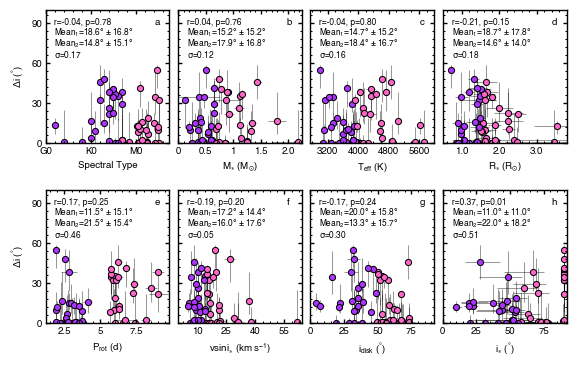

In [56]:
parplot_fontsize = 17
parplot_title_fontsize = 17

target_labels_on = False

save_figs = True


colormap = choose_cmap('cyber grape', reverse_cmap=False)



x_variations = ['SpT', 'mass','Teff', 'radius', 'Prot', 'vsini', 'disk inclination', 'star inclination']
y_variable = 'disk diff'



grid_width = 4
grid_width_cbar = grid_width + 1
grid_height = 2



gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[1, 1, 1, 1])

fig_width = 14 * 0.40
fig_height = 9 * 0.40


fig = plt.figure(figsize=(fig_width, fig_height))
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width_cbar - 1)]
ax_keys = list(hists_to_create.keys())

panel_colors = ['#99004d', '#990099', '#5031be', '#4973da', '#3aa8d7', '#68d9da', '#d1f4cd', '#fdfec7']


ED_Figure_3_Source_Data = {}

letter_strings = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
letter_i = 0


for ax_i, ax in enumerate(axes):

    ax.minorticks_on()

    x_variable = x_variations[ax_i]

    plot_variables = [x_variable, y_variable]

    if 'star inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'star inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i star (deg)'
            x_column_err_p = 'i star -Unc'
            x_column_err_m = 'i star +Unc'
            x_label = r'i$_{\ast}$ ($^\degree$)'
            x_text = 'i_Star'
            x_key = 'istar (deg)'
            x_err_p_key = 'istar +Unc'
            x_err_m_key = 'istar -Unc'
            xlims = [0, 92]

    if 'disk inclination' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'disk inclination' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'i disk (deg)'
            x_column_err_p = 'i disk Unc'
            x_column_err_m = 'i disk Unc'
            x_label = r'i$_{disk}$ ($^\degree$)'
            xlims = [0, 92]
            x_text = 'i_Disk'
            x_key = 'idisk (deg)'
            x_err_p_key = 'idisk +Unc'
            x_err_m_key = 'idisk -Unc'
            x_disk_flag = 0

    if 'mass' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'mass' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Mstar (Msun)'
            x_column_err_p = 'Mstar Unc'
            x_column_err_m = 'Mstar Unc'
            x_label = r'M$_{\ast}$ (M$_{\odot}$)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Mstar'
            x_key = 'Mstar (Msun)'
            x_err_p_key = 'Mstar +Unc'
            x_err_m_key = 'Mstar -Unc'

    if 'radius' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'radius' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Rstar (Rsun)'
            x_column_err_p = 'Rstar Unc'
            x_column_err_m = 'Rstar Unc'
            x_label = r'R$_{\ast}$ (R$_{\odot}$)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Rstar'
            x_key = 'Rstar (Rsun)'
            x_err_p_key = 'Rstar +Unc'
            x_err_m_key = 'Rstar -Unc'

    if 'vsini' in plot_variables:
        vsinis = np.array(df_adopted['vsini (km/s)'].values)
        vsini_errs = np.array(df_adopted['vsini Unc'].values)
        veqs = np.array(df_adopted['Veq'].values)
        veq_errs = np.array(df_adopted['Veq Unc'].values)

        test_targs = df_adopted['Target'].values
        
        axis_bool = [index for index in range(len(plot_variables)) if 'vsini' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'vsini (km/s)'
            x_column_err_p = 'vsini Unc'
            x_column_err_m = 'vsini Unc'
            x_label = r'vsini$_{\ast}$ (km s$^{-1}$)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'vsini'
            x_key = 'vsini (km/s)'
            x_err_p_key = 'vsini +Unc'
            x_err_m_key = 'vsini -Unc'

    if 'Prot' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Prot' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Prot (d)'
            x_column_err_p = 'Prot Unc'
            x_column_err_m = 'Prot Unc'
            x_label = r'P$_{rot}$ (d)'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'Prot'
            x_key = 'Prot (d)'
            x_err_p_key = 'Prot +Unc'
            x_err_m_key = 'Prot -Unc'
    
    if 'Teff' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'Teff' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'Teff (K)'
            x_column_err_p = 'Teff Unc'
            x_column_err_m = 'Teff Unc'
            x_label = r'T$_{eff}$ (K)'
            xlims = hists_to_create[x_column]['Bin Range']  # [2900, 5100]
            x_text = 'Teff'
            x_key = 'Teff (K)'
            x_err_p_key = 'Teff +Unc'
            x_err_m_key = 'Teff -Unc'

    if 'SpT' in plot_variables:
        axis_bool = [index for index in range(len(plot_variables)) if 'SpT' in plot_variables[index]][0]
        if axis_bool == 0:
            x_column = 'SpType'
            x_column_err_p = 'SpType Unc'
            x_column_err_m = 'SpType Unc'
            x_label = 'Spectral Type'
            xlims = hists_to_create[x_column]['Bin Range']
            x_text = 'SpT'
            x_key = 'Spectral Type'

    y_column = 'disk diff'
    y_column_err_p = 'disk diff +Unc'
    y_column_err_m = 'disk diff -Unc'
    y_label = r'$\Delta$i ($^\degree$)'
    ylims = [-2, 90]
    y_text = 'Delta_i'
    y_key = 'Deltai (deg)'
    y_err_p_key = 'Deltai +Unc'
    y_err_m_key = 'Deltai -Unc'


    plot_x_values = []
    plot_x_err_p = []
    plot_x_err_m = []
    for value_i, value in enumerate(df_adopted[x_column].values):
        val_err_p = df_adopted[x_column_err_p].values[value_i]
        val_err_m = df_adopted[x_column_err_m].values[value_i]
        if type(value) == str:
            if '[' in value:
                val1 = float(value.replace('[', '').replace(']', '').split(',')[0])
                val2 = float(value.replace('[', '').replace(']', '').split(',')[1])
                value = np.mean([val1, val2])
                val_err_p = abs(value - val1)
                val_err_m = abs(value - val1)
        plot_x_values.append(float(value))
        plot_x_err_p.append(val_err_p)
        plot_x_err_m.append(val_err_m)

    parameter_x_stassun = np.array(plot_x_values)
    parameter_x_err_p_stassun = np.array(plot_x_err_p)
    parameter_x_err_m_stassun = np.array(plot_x_err_m)
    parameter_y_stassun = np.array(df_adopted[y_column].values)
    parameter_y_err_p_stassun = np.array(df_adopted[y_column_err_p].values)
    parameter_y_err_m_stassun = np.array(df_adopted[y_column_err_m].values)
    targets_list_stassun = np.array(df_adopted['Simbad Name'].values)

    parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
    parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]



    point_size = 2.4
    point_colors = ['#ad33ff']*len(parameter_y_stassun)
    point_edgecolors = ['#000000']*len(point_colors)
    inner_edgecolors = ['#260099']*len(point_colors)
    edge_width = 2.5

    print('\n' + x_column)  # , ':', len(parameter_x_stassun))

    sorted_x, sorted_y = zip(*sorted(zip(parameter_x_stassun, parameter_y_stassun)))

    sample1 = sorted_y[:int(np.floor(len(sorted_y)*0.5))]
    sample2 = sorted_y[int(np.floor(len(sorted_y)*0.5)):]
    sample1x = sorted_x[:int(np.floor(len(sorted_x)*0.5))]
    sample2x = sorted_x[int(np.floor(len(sorted_x)*0.5)):]
    splitx = np.mean([sample1x[-1], sample2x[0]])



    deltai_draws = []
    n_delta_i_draws = 100

    point_size = 2.5
    point_linewidth = 0.75
    error_linewidth = 0.75

    for par_i in range(len(parameter_y_stassun)):
        if parameter_x_stassun[par_i] < splitx:
            point_color_x = '#ad33ff'
        if parameter_x_stassun[par_i] > splitx:
            point_color_x = '#ff66cc'
        ax.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], color=point_color_x, edgecolors=point_edgecolors[par_i], s=np.pi*point_size**2, linewidth=point_linewidth, linestyle='None', zorder=-1)
        ax.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                    elinewidth=error_linewidth, linewidth=0, capsize=0, ecolor=point_edgecolors[par_i], capthick=2, alpha=0.4, zorder=-2)
        
        target_i = targets_list_stassun[par_i].replace(' ', '')
        if '/' in target_i:
            target_i = target_i.replace('/', '-')

        Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_i + '.csv')
        i_values = Pdensity['i (deg)'].values
        P_Delta_i = Pdensity['P(Delta i | d)'].values

        deltai_draws.append(choices(i_values, weights=P_Delta_i, k=n_delta_i_draws))
    


    ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + x_key] = parameter_x_stassun
    if x_key != 'Spectral Type':
        ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + x_err_p_key] = parameter_x_err_stassun[1]
        ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + x_err_m_key] = parameter_x_err_stassun[0]
    ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + y_key] = parameter_y_stassun
    ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + y_err_p_key] = parameter_y_err_stassun[1]
    ED_Figure_3_Source_Data[letter_strings[letter_i] + ' ' + y_err_m_key] = parameter_y_err_stassun[0]
        


    ax.set_xlim(xlims)
    ax.set_ylim(0, 100)



    # Make sure line thicknesses meet journal standards
    spine_linewidth = 1.0
    minor_linewidth = 0.75
    major_linewidth = 1.0
    minor_linelength = 1.75
    major_linelength = 3.0
    for spine in ax.spines.values():
        spine.set_linewidth(spine_linewidth)

    ax.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, pad=2.5, labelsize=font_size)
    ax.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)


    if x_column == 'SpType':
        sptype_designations = {'3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,0.5) == 0):  #  and (xtick >= xlims[0]):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=font_size, weight='light')

    if (y_column == 'disk diff') or (y_column == 'i star (deg)') or (y_column == 'i disk (deg)'):
        # ytickvals = np.arange(0, 105, 15)
        ytickvals = np.arange(0, 90 + 30, 30)
        yticks = [int(ytick) for ytick in ytickvals]
        ax.set_yticks(yticks)
        yticklabels = ax.set_yticklabels(yticks, fontsize=font_size, weight='light')
        Number_of_minor_ticks_between_major_ticks = 3
        
        minor_locator = AutoMinorLocator(5)
        ax.yaxis.set_minor_locator(minor_locator)

    # Set ticks parameters for each x-axis parameter
    if x_column == 'SpType':
        # Convert numerical representations of SpType to strings
        sptype_designations = {'2.75': 'F7.5',
                               '3.00': 'G0',
                               '3.25': 'G2.5',
                               '3.50': 'G5',
                               '3.75': 'G7.5',
                               '4.00': 'K0',
                               '4.25': 'K2.5',
                               '4.50': 'K5',
                               '4.75': 'K7.5',
                               '5.00': 'M0',
                               '5.25': 'M2.5',
                               '5.50': 'M5',
                               '5.75': 'M7.5',
                               }
        keys_list = list(sptype_designations.keys())
        xtickvals = [float(key) for key in keys_list]
        xticklabs = []
        xticks = []
        for xtick_i, xtick in enumerate(xtickvals):
            if (np.mod(xtick,1) == 0):
                xticks.append(xtick)
                xticklabs.append(sptype_designations[keys_list[xtick_i]])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabs, fontsize=font_size, weight='light')

    if x_column == 'Mstar (Msun)':
        xtickvals = [0, 0.5, 1, 1.5, 2.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if x_column == 'Rstar (Rsun)':
        xtickvals = [1.0, 2.0, 3.0]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if x_column == 'Prot (d)':
        xtickvals = [2.5, 5, 7.5]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if (x_column == 'i disk (deg)') or (x_column == 'i star (deg)'):
        xtickvals = [0, 25, 50, 75]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')
        
    if x_column == 'vsini (km/s)':
        xtickvals = [10, 25, 40, 55]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')

    if x_column == 'Teff (K)':
        xtickvals = [3200, 4000, 4800, 5600]
        ax.set_xticks(xtickvals)
        ax.set_xticklabels(xtickvals, fontsize=font_size, weight='light')



    ax.set_xlabel(x_label, fontsize=font_size, weight='light', labelpad=4)
    if np.mod(ax_i, grid_width_cbar-1) == 0:
        ax.set_ylabel(y_label, fontsize=font_size, weight='light', labelpad=4)
    else:
        ax.set_ylabel(' ')
        ax.set_yticklabels([])




    delta_i_draws_transposed = np.transpose(deltai_draws)

    r_values = []
    p_values = []
    test_colors = ['blue', 'red', 'green']
    # draw_bep = 0
    for draw_i in delta_i_draws_transposed:
        r_value_draw, p_value_draw = stats.pearsonr(parameter_x_stassun, draw_i)
        r_values.append(r_value_draw)
        p_values.append(p_value_draw)

    r_value, p_value= stats.pearsonr(parameter_x_stassun, parameter_y_stassun)

    print("Pearson correlation coefficient:", r_value)
    print("P-value:", p_value)

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)

    snr = (abs(mean1 - mean2)) / (np.sqrt(std1**2 + std2**2))

    PearsonR_text = "r={:.2f}, p={:.2f}".format(r_value, p_value)
    mean1_text = r"Mean$_{1}$" + r"={:.1f}$\degree$ $\pm$ {:.1f}$\degree$".format(mean1, std1)
    mean2_text = r"Mean$_{2}$" + r"={:.1f}$\degree$ $\pm$ {:.1f}$\degree$".format(mean2, std2)
    snr_text = r'$\sigma$={:.2f}'.format(snr)

    ax.text(0.07, 0.87, PearsonR_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size-1, weight='light', transform=ax.transAxes)
    ax.text(0.07, 0.78, mean1_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size-1, weight='light', transform=ax.transAxes)  # , color='#ad33ff')
    ax.text(0.07, 0.70, mean2_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size-1, weight='light', transform=ax.transAxes)  # , color='#ff66cc')
    ax.text(0.07, 0.625, snr_text, horizontalalignment='left', verticalalignment='bottom', fontsize=font_size-1, weight='light', transform=ax.transAxes)

    ax.text(0.88, 0.87, letter_strings[letter_i], horizontalalignment='left', verticalalignment='bottom', fontsize=font_size, weight='bold', transform=ax.transAxes)

    letter_i += 1




# fig.subplots_adjust(left=0.06, bottom=0.11, right=0.99, top=0.945, wspace=0.07, hspace=0.35)
fig.subplots_adjust(left=0.06, bottom=0.11, right=0.99, top=0.98, wspace=0.07, hspace=0.35)


nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
save_string = 'Extended_Data_Figure_3.pdf'
fig.savefig(nature_figures_directory + save_string, dpi=300)

nature_figures_directory2 = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Figures_and_Tables/'
save_string2 = 'Biddle_EDfig3.pdf'
fig.savefig(nature_figures_directory2 + save_string2, dpi=300)
    
ED_Figure_3_Source_Data_df = pd.DataFrame(ED_Figure_3_Source_Data)
ED_Figure_3_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_3.csv', index=False)

plt.show()
plt.close()





# Misalignment Rate Statistics

In [59]:
misaligned_individual_95percent_confidence = []

misaligned_1_95percent_confidence = []

misaligned_2_95percent_confidence = []

misaligned_3_95percent_confidence = []

misalignment_bounds = [10, 20, 40]


test_df = df_adopted
sample_size = len(test_df['Simbad Name'].values)


for target_i in range(sample_size):
    bep = 0

    target_str = test_df['Simbad Name'].values[target_i].replace(' ', '')
    if '/' in test_df['Simbad Name'].values[target_i]:
        target_str = target_str.replace('/', '-')

    Pdensity = pd.read_csv(distribution_dir + 'Prob_' + target_str + '.csv')
    i_values = Pdensity['i (deg)'].values

    P_Delta_i = Pdensity['P(Delta i | d)'].values
    MAP_Delta_i = Pdensity['Delta i MAP'].values[0]
    sig1_m_Delta_i = Pdensity['Delta i -Unc1'].values[0]
    sig1_p_Delta_i = Pdensity['Delta i +Unc1'].values[0]

    P_Delta_i = P_Delta_i/(sum(P_Delta_i)*np.diff(i_values)[0])

    lower_uncertainty = sig1_m_Delta_i

    if MAP_Delta_i > 1:

        if MAP_Delta_i/lower_uncertainty >= 2.0:
            misaligned_individual_95percent_confidence.append(target_str)
            if MAP_Delta_i >= misalignment_bounds[0]:
                misaligned_1_95percent_confidence.append(target_str)
            if MAP_Delta_i >= misalignment_bounds[1]:
                misaligned_2_95percent_confidence.append(target_str)
            if MAP_Delta_i >= misalignment_bounds[2]:
                misaligned_3_95percent_confidence.append(target_str)


2MASSJ04124068+2438157 37.40119109103676
2MASSJ11004022-7619280 18.753044773101212
2MASSJ16083070-3828268 47.95201332550951
AS209 34.73065768494794
BPTau 36.57069680487983
CIDA-7 63.88346042919764
DNTau 24.081809187828142
FTTau 23.57697765611193
IMLup 30.5780619806382
RXJ1615.3-3255 331.2808939711299
RXJ1842.9-3532 63.839774521798475
RXJ1852.3-3700 83.85762613850953
Sz114 12.56991735139587
TWHya 13.852098653862384
V836Tau 87.49660961540246
WSB52 35.51188677190989


In [61]:

misaligned_individual_95percent_confidence_fraction = round(len(misaligned_individual_95percent_confidence)/sample_size, 2)
misaligned_1_95percent_confidence_fraction = round(len(misaligned_1_95percent_confidence)/sample_size, 2)
misaligned_2_95percent_confidence_fraction = round(len(misaligned_2_95percent_confidence)/sample_size, 2)
misaligned_3_95percent_confidence_fraction = round(len(misaligned_3_95percent_confidence)/sample_size, 2)


# Binomial statistics to determine underlying misalignment rate
x = np.linspace(0, 1, 1000)
n = sample_size
k_individual = len(misaligned_individual_95percent_confidence)
k_95percent_10 = len(misaligned_1_95percent_confidence)
k_95percent_15 = len(misaligned_2_95percent_confidence)
k_95percent_20 = len(misaligned_3_95percent_confidence)


prob_dist_individual = bb_binomial_ppd(x, k_individual, n, normapprox=False)
prob_dist_95percent_10 = bb_binomial_ppd(x, k_95percent_10, n, normapprox=False)
prob_dist_95percent_15 = bb_binomial_ppd(x, k_95percent_15, n, normapprox=False)
prob_dist_95percent_20 = bb_binomial_ppd(x, k_95percent_20, n, normapprox=False)


misaligned_prob_individual, sig1_misaligned_m_individual, sig1_misaligned_p_individual, _, _ = highest_density_interval(x=x, pdf_y=prob_dist_individual, sigma=0.6827, return_pdf=True)
misaligned_prob_95percent_10, sig1_misaligned_95percent_m_10, sig1_misaligned_95percent_p_10, _, _ = highest_density_interval(x=x, pdf_y=prob_dist_95percent_10, sigma=0.6827, return_pdf=True)
misaligned_prob_95percent_15, sig1_misaligned_95percent_m_15, sig1_misaligned_95percent_p_15, _, _ = highest_density_interval(x=x, pdf_y=prob_dist_95percent_15, sigma=0.6827, return_pdf=True)
misaligned_prob_95percent_20, sig1_misaligned_95percent_m_20, sig1_misaligned_95percent_p_20, _, _ = highest_density_interval(x=x, pdf_y=prob_dist_95percent_20, sigma=0.6827, return_pdf=True)


print('MISALIGNED >= 2sig:  ', '{:d}/{:d}'.format(len(misaligned_individual_95percent_confidence), sample_size), '({:d}+{:d}-{:d} %)'.format(int(np.round(misaligned_prob_individual*100)), int(np.round(sig1_misaligned_p_individual*100)), int(np.round(sig1_misaligned_m_individual*100))))
print('MISALIGNED >= {:d} deg:  '.format(misalignment_bounds[0]), '{:d}/{:d}'.format(len(misaligned_1_95percent_confidence), sample_size), '({:d}+{:d}-{:d} %)'.format(int(np.round(misaligned_prob_95percent_10*100)), int(np.round(sig1_misaligned_95percent_p_10*100)), int(np.round(sig1_misaligned_95percent_m_10*100))))
print('MISALIGNED >= {:d} deg:  '.format(misalignment_bounds[1]), '{:d}/{:d}'.format(len(misaligned_2_95percent_confidence), sample_size), '({:d}+{:d}-{:d} %)'.format(int(np.round(misaligned_prob_95percent_15*100)), int(np.round(sig1_misaligned_95percent_p_15*100)), int(np.round(sig1_misaligned_95percent_m_15*100))))
print('MISALIGNED >= {:d} deg:  '.format(misalignment_bounds[2]), '{:d}/{:d}'.format(len(misaligned_3_95percent_confidence), sample_size), '({:d}+{:d}-{:d} %)'.format(int(np.round(misaligned_prob_95percent_20*100)), int(np.round(sig1_misaligned_95percent_p_20*100)), int(np.round(sig1_misaligned_95percent_m_20*100))))
print('--------------------')

print(' ')
print('MISALIGNED >= 2sig: \n', misaligned_individual_95percent_confidence)
print(' ')
print('TARGETS MISALIGNED >= {:d} deg: \n'.format(misalignment_bounds[0]), misaligned_1_95percent_confidence)
print(' ')
print('TARGETS MISALIGNED >= {:d} deg: \n'.format(misalignment_bounds[1]), misaligned_2_95percent_confidence)
print(' ')
print('TARGETS MISALIGNED >= {:d} deg: \n'.format(misalignment_bounds[2]), misaligned_3_95percent_confidence)

MISALIGNED >= 2sig:   16/49 (33+7-6 %)
MISALIGNED >= 10 deg:   16/49 (33+7-6 %)
MISALIGNED >= 20 deg:   11/49 (22+6-5 %)
MISALIGNED >= 40 deg:   6/49 (12+5-4 %)
--------------------
 
MISALIGNED >= 2sig: 
 ['2MASSJ04124068+2438157', '2MASSJ11004022-7619280', '2MASSJ16083070-3828268', 'AS209', 'BPTau', 'CIDA-7', 'DNTau', 'FTTau', 'IMLup', 'RXJ1615.3-3255', 'RXJ1842.9-3532', 'RXJ1852.3-3700', 'Sz114', 'TWHya', 'V836Tau', 'WSB52']
 
TARGETS MISALIGNED >= 10 deg: 
 ['2MASSJ04124068+2438157', '2MASSJ11004022-7619280', '2MASSJ16083070-3828268', 'AS209', 'BPTau', 'CIDA-7', 'DNTau', 'FTTau', 'IMLup', 'RXJ1615.3-3255', 'RXJ1842.9-3532', 'RXJ1852.3-3700', 'Sz114', 'TWHya', 'V836Tau', 'WSB52']
 
TARGETS MISALIGNED >= 20 deg: 
 ['2MASSJ04124068+2438157', '2MASSJ16083070-3828268', 'AS209', 'BPTau', 'CIDA-7', 'IMLup', 'RXJ1615.3-3255', 'RXJ1842.9-3532', 'RXJ1852.3-3700', 'V836Tau', 'WSB52']
 
TARGETS MISALIGNED >= 40 deg: 
 ['2MASSJ16083070-3828268', 'CIDA-7', 'RXJ1615.3-3255', 'RXJ1842.9-3532', 'RX

# Plot Figure 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


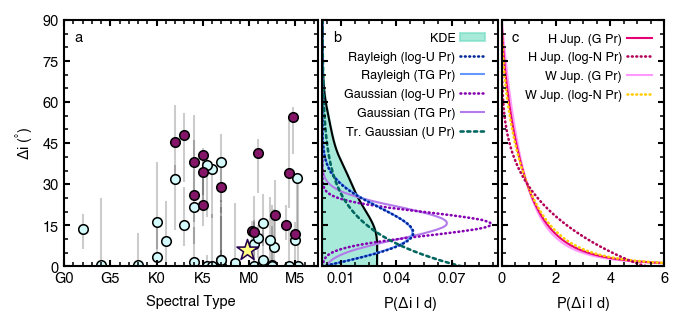

In [62]:

x_column = 'SpType'
x_column_err_p = 'SpType Unc'
x_column_err_m = 'SpType Unc'
x_label = 'Spectral Type'
xlims = [3.0, 5.75]
x_text = 'SpT'

y_column = 'disk diff'
y_column_err_p = 'disk diff +Unc'
y_column_err_m = 'disk diff -Unc'
y_label = r'$\Delta i$ ($^\degree$)'
ylims = [-2, 90]
y_text = 'Delta_i'

z_column = 'i star (deg)'
z_column_err_p = 'i star -Unc'
z_column_err_m = 'i star +Unc'
z_label = r'$i_{*}$ ($^\degree$)'
zlims = [0, 90]
z_text = 'i_Star'

parameter_z_norm = plt.Normalize(zlims[0], zlims[1])

parameter_x_stassun = np.array(df_adopted[x_column].values)
parameter_x_err_p_stassun = np.array(df_adopted[x_column_err_p].values)
parameter_x_err_m_stassun = np.array(df_adopted[x_column_err_m].values)
parameter_y_stassun = np.array(df_adopted[y_column].values)
parameter_y_err_p_stassun = np.array(df_adopted[y_column_err_p].values)
parameter_y_err_m_stassun = np.array(df_adopted[y_column_err_m].values)
parameter_z_stassun = np.array(df_adopted[z_column].values)
parameter_z_err_p_stassun = np.array(df_adopted[z_column_err_p].values)
parameter_z_err_m_stassun = np.array(df_adopted[z_column_err_m].values)
targets_list_stassun = np.array(df_adopted['Simbad Name'].values)

parameter_x_err_stassun = [parameter_x_err_m_stassun, parameter_x_err_p_stassun]
parameter_y_err_stassun = [parameter_y_err_m_stassun, parameter_y_err_p_stassun]
parameter_z_err_stassun = [parameter_z_err_m_stassun, parameter_z_err_p_stassun]





shrink_factor = 0.15

grid_height = 1
grid_width = 3

fig_width = 14.5 * 0.30
fig_height = 5.80 * 0.35

fig = plt.figure(figsize=(fig_width, fig_height), dpi=150)
gs = gridspec.GridSpec(grid_height, grid_width, width_ratios=[1, 0.69, 0.64], height_ratios=[1])
axes = [fig.add_subplot(gs[ii, jj]) for ii in range(grid_height) for jj in range(grid_width)]
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax1.set_rasterized(False)


ax1.set_xlabel(x_label, fontsize=font_size, weight='light', labelpad=4)
ax1.set_ylabel(r'$\Delta$i ($^\degree$)', fontsize=font_size, weight='light', labelpad=3)
ax2.set_xlabel(r'P($\Delta$i | d)', fontsize=font_size, weight='light', labelpad=4)
ax3.set_xlabel(r'P($\Delta$i | d)', fontsize=font_size, weight='light', labelpad=4)


# Create list of colors according to each target's (mis)alignment
point_colors = []
point_size = 140 * shrink_factor
point_linewidth = 0.75
error_linewidth = 1
for point_i in range(len(parameter_y_stassun)):
    target_str = targets_list_stassun[point_i].replace(' ', '')
    if target_str in misaligned_individual_95percent_confidence:
        point_colors.append('#841568')
    else:
        point_colors.append('#d3fbfb')


# -------------------------------------- THE SAMPLE ---------------------------------------  #
for par_i in range(len(parameter_y_stassun)):

    if parameter_z_stassun[par_i] == 90.0:
        zord = -4
    if parameter_z_stassun[par_i] < 90:
        zord = -1
    ax1.scatter([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], marker='o', color=point_colors[par_i], edgecolors='#000000', linewidth=point_linewidth, s=point_size, linestyle='None', zorder=zord)
    ax1.errorbar([parameter_x_stassun[par_i]], [parameter_y_stassun[par_i]], xerr=[[parameter_x_err_stassun[0][par_i]],[parameter_x_err_stassun[1][par_i]]], yerr=[[parameter_y_err_stassun[0][par_i]], [parameter_y_err_stassun[1][par_i]]],
                elinewidth=error_linewidth, linewidth=0, capsize=0, ecolor='#000000', capthick=0, alpha=0.2, zorder=-5)
# ---------------------------------------------------------------------------------------- #
Panel_1A_Source_Data = {'Spectral Type': df_adopted['SpType Letter'].values,
                            'Delta i (deg)': parameter_y_stassun,
                            'Delta i +Uncertainty': parameter_y_err_stassun[1],
                            'Delta i -Uncertainty': parameter_y_err_stassun[0],
                            }
Panel_1A_Source_Data_df = pd.DataFrame(Panel_1A_Source_Data)
Panel_1A_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Figure_1a.csv', index=False)



plot_linewidth = 1
zorder_shift = 10
# ------------------------------ KERNEL DENSITY ESTIMATION ------------------------------- #
kde_color = '#6fdcc1'
ax2.plot(density_estimation_total_positive_x, x_grid_plot, color='#000000', lw=plot_linewidth, zorder=2-zorder_shift)
ax2.fill_between(density_estimation_total_positive_x, x_grid_plot, color=kde_color, alpha=0.6, label='KDE', zorder=1-zorder_shift)
# ---------------------------------------------------------------------------------------- #
Panel_1B_Source_Data_KDE = {'Delta i (deg)': x_grid_plot,
                           'KDE (deg)': density_estimation_total_positive_x,
                           }
Panel_1B_Source_Data_KDE_df = pd.DataFrame(Panel_1B_Source_Data_KDE)
Panel_1B_Source_Data_KDE_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Figure_1b_KDE.csv', index=False)




# -------------------------------------- HBM MODELS -------------------------------------- #
Panel_1B_Source_Data_HBM = {'Delta i (deg)': ivals,
                            }

for HBM_key in list(Delta_i_HBM_files.keys()):

    model_profile = Delta_i_HBM_files[HBM_key]['Model Profile']

    if HBM_key == R_lU_label:
        model_linewidth = 1.25
        model_linestyle = '-'
        model_dashes = (0.3, 1.4)
        model_capstyle = 'round'
        model_color = '#002699'
        model_zorder = 6
    if HBM_key == R_G_label:
        model_linewidth = 1
        model_linestyle = '-'
        model_dashes = (1, 0)
        model_capstyle = 'butt'
        model_color = '#6699ff'
        model_zorder = 5
    if HBM_key == G_lU_label:
        model_linewidth = 1.25
        model_linestyle = '-'
        model_dashes = (0.3, 1.4)
        model_capstyle = 'round'
        model_color = '#8600b3'
        model_zorder = 4
    if HBM_key == G_G_label:
        model_linewidth = 1
        model_linestyle = '-'
        model_dashes = (1, 0)
        model_capstyle = 'butt'
        model_color = '#b37bea'
        model_zorder = 3
    if HBM_key == TG_U_label:
        model_linewidth = 1.25
        model_linestyle = '-'
        model_dashes = (1.2, 1.4)
        model_capstyle = 'round'
        model_color = '#00665f'
        model_zorder = 7
        HBM_key = 'Tr. Gaussian (U Pr)'
    ax2.plot(model_profile, ivals, lw=model_linewidth, linestyle=model_linestyle, dashes=model_dashes, dash_capstyle=model_capstyle, color=model_color, label=HBM_key, zorder=model_zorder-zorder_shift)
    
    Panel_1B_Source_Data_HBM[HBM_key] = model_profile

Panel_1B_Source_Data_HBM_df = pd.DataFrame(Panel_1B_Source_Data_HBM)
Panel_1B_Source_Data_HBM_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Figure_1b_HBM.csv', index=False)
# ---------------------------------------------------------------------------------------- #





# ----------------------------------- WARM AND HOT JUPITERS ---------------------------------- #

HJ_Gaussian = 2.40, 0.59
HJ_LogNorm = 5.14, 0.99
WJ_Gaussian = 2.04, 0.56
WJ_LogNorm = 2.74, 0.63

HotJ_G = beta(HJ_Gaussian[0], HJ_Gaussian[1])
HotJ_LN = beta(HJ_LogNorm[0], HJ_LogNorm[1])
WarmJ_G = beta(WJ_Gaussian[0], WJ_Gaussian[1])
WarmJ_LN = beta(WJ_LogNorm[0], WJ_LogNorm[1])

xspace = np.linspace(1, 0, len(x_grid_plot))

HJ_color1 = '#e60073'
HJ_color2 = '#b30059'
WJ_color1 = '#ff99ff'
WJ_color2 = '#ffcc00'

HotJ_G_curve = HotJ_G.pdf(xspace)
HotJ_LN_curve = HotJ_LN.pdf(xspace)
WarmJ_G_curve = WarmJ_G.pdf(xspace)
WarmJ_LN_curve = WarmJ_LN.pdf(xspace)



ax3.plot(HotJ_G_curve, x_grid_plot, lw=1, color=HJ_color1, zorder=2-3*zorder_shift, label='H Jup. (G Pr)')
ax3.plot(HotJ_LN_curve, x_grid_plot, lw=1.25, linestyle='-', color=HJ_color2, dashes=(0.3, 1.4), dash_capstyle='round', zorder=2-1*zorder_shift, label='H Jup. (log-N Pr)')
ax3.plot(WarmJ_G_curve, x_grid_plot, lw=1, color=WJ_color1, zorder=2-4*zorder_shift, label='W Jup. (G Pr)')
ax3.plot(WarmJ_LN_curve, x_grid_plot, lw=1.25, linestyle='-', color=WJ_color2, dashes=(0.3, 1.4), dash_capstyle='round', zorder=2-2*zorder_shift, label='W Jup. (log-N Pr)')

# ------------------------------------------ THE SUN ----------------------------------------- #
Solar_SpType = 4.98
Solar_SpType_err = 0.1
Solar_obliquity = 6.0
Solar_point_size = 750 * shrink_factor

sun_color = '#ffff80'  # '#ace600'
sun_edgecolor = '#26004d'  # '#001a33'
ax1.scatter([Solar_SpType], [Solar_obliquity], marker='*', color=sun_color, edgecolors=sun_edgecolor, linewidth=0.75, s=Solar_point_size, linestyle='None')  # , label='The Pre-main Sequence Sun')
# ---------------------------------------------------------------------------------------- #

for spine in ax2.spines.values():
    spine.set_zorder(100)


sptype_designations = {'0': 'B',
                    '0.5': 'B5',
                    '1': 'A0',
                    '1.5': 'A5',
                    '2': 'F0',
                    '2.5': 'F5',
                    '3': 'G0',
                    '3.5': 'G5',
                    '4': 'K0',
                    '4.5': 'K5',
                    '5': 'M0',
                    '5.5': 'M5',
                    }

xtickvals = [3.0, 3.5, 4, 4.5, 5, 5.5]
xticklabs = []
xticks = []
for xtick in xtickvals:
    if xtick < xlims[1]:
        if (np.mod(xtick,1) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations[str(int(xtick))])
        elif (np.mod(xtick,0.5) == 0) and (xtick >= xlims[0]):
            xticks.append(xtick)
            xticklabs.append(sptype_designations['{:.1f}'.format(xtick)])
ax1.set_xticks(xticks)
xticklabels = ax1.set_xticklabels(xticklabs, fontsize=font_size, weight='light')


ax2_xtickvals = [0.01, 0.04, 0.07]
ax2.set_xticks(ax2_xtickvals)
ax2.set_xticklabels(ax2_xtickvals, fontsize=font_size, weight='light')




ytickvals_major = np.arange(0, 105, 15)
yticks_major = [int(ytick) for ytick in ytickvals_major]
ax1.set_yticks(yticks_major, which='major')
ax2.set_yticks(yticks_major, which='major')
ax3.set_yticks(yticks_major, which='major')
yticklabels = ax1.set_yticklabels(yticks_major, fontsize=font_size, weight='light')
ax2.set_yticklabels([])
ax3.set_yticklabels([])

Number_of_minor_ticks_between_major_ticks = 3
yticks_minor = AutoMinorLocator(Number_of_minor_ticks_between_major_ticks) 
ax1.yaxis.set_minor_locator(yticks_minor)
ax2.yaxis.set_minor_locator(yticks_minor)
ax3.yaxis.set_minor_locator(yticks_minor)


ax1.set_xlim(xlims)
ax1.set_ylim(0, 90)
ax2.set_xlim(0, 0.095)
ax2.set_ylim(0, 90)
ax3.set_xlim(0, 6)
ax3.set_ylim(0, 90)


# Make sure line thicknesses meet journal standards
spine_linewidth = 1.0
minor_linewidth = 0.75
major_linewidth = 1.0
minor_linelength = 1.75
major_linelength = 3.0
for spine in ax1.spines.values():
    spine.set_linewidth(spine_linewidth)
for spine in ax2.spines.values():
    spine.set_linewidth(spine_linewidth)
for spine in ax3.spines.values():
    spine.set_linewidth(spine_linewidth)

ax1.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, labelsize=font_size)
ax1.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)
ax2.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, labelsize=font_size)
ax2.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)
ax3.tick_params(which='minor', length=minor_linelength, width=minor_linewidth, labelsize=font_size)
ax3.tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)


leg1 = ax1.legend(loc='upper right', prop={'size': font_size-1}, markerfirst=False, handletextpad=0.4, bbox_to_anchor=(0, 0, 1, 1))
leg2 = ax2.legend(loc='upper right', prop={'size': font_size-1}, markerfirst=False, handletextpad=0.4, bbox_to_anchor=(0, 0, 1, 1))
leg3 = ax3.legend(loc='upper right', prop={'size': font_size-1}, markerfirst=False, handletextpad=0.4, bbox_to_anchor=(0, 0, 1, 1))


ax1.text(0.04, 0.93, 'a', horizontalalignment='left', verticalalignment='center', fontsize=font_size, weight='bold', transform=ax1.transAxes)
ax2.text(0.06, 0.93, 'b', horizontalalignment='left', verticalalignment='center', fontsize=font_size, weight='bold', transform=ax2.transAxes)
ax3.text(0.06, 0.93, 'c', horizontalalignment='left', verticalalignment='center', fontsize=font_size, weight='bold', transform=ax3.transAxes)


fig.subplots_adjust(left=0.07, bottom=0.14, right=0.99, top=0.95, wspace=0.02, hspace=0)
labels_text = 'bep'

nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
save_string = 'Main_Text_Figure_1.pdf'
fig.savefig(nature_figures_directory + save_string, dpi=300)

plt.show()
plt.close()

# Create Family of Deltai Distributions to take into account measurements uncertainties and plot ED Figure 4

In [66]:
tables_dictionary = '/Users/lib278/Documents/Manuscripts/OBLIQUITY_SYNTHESIS/Tables/'

In [67]:
def draw_data_for_kde(distributions, prob_i, posterior_i_values, kde_n_draws, target_list):

    # ------------------ GENERATE ARRAY OF DRAWS FROM ALL PROBABILITY DISTRIBUTIONS ------------------ #

    data_for_kde = []
    
    for target in distributions.keys():

        if target in target_list:

            Deltai_distributions = distributions[target]

            if prob_i < len(Deltai_distributions):
                P_Delta_i_target = np.array(Deltai_distributions[prob_i])
                if len(P_Delta_i_target) > 0:
                    if len(np.where(P_Delta_i_target > 0)[0]) > 0:
                        data_for_kde.extend(choices(posterior_i_values, P_Delta_i_target, k=kde_n_draws))
            # else:
            #     print('issue with ', target)

    data_for_kde = np.array(data_for_kde).reshape(-1, 1)

    return data_for_kde

def generate_kde(data_for_kde, posterior_i_values, dx, kde_bandwidth):

    bep1 = np.array(posterior_i_values)
    bep2 = bep1[-1] + bep1[1::]
    i_values = np.concatenate((bep1, bep2))
    # print('original_i_values: ', bep1[0:3], bep1[-3::], '\n')
    # print(bep2[0:10], bep2[-10::])
    # print('long_i_values:', i_values[0:3], i_values[-3::], '\n')

    reverse_negative_i_values = -i_values[::-1][:-1]
    i_values_mirrored_across_zero = np.concatenate((np.array(reverse_negative_i_values), np.array(i_values)))
    # print('i_values_mirrored_across_zero: ', i_values_mirrored_across_zero[0:3], i_values_mirrored_across_zero[-3::], '\n')
    x_grid_all = np.array(i_values_mirrored_across_zero).reshape(-1, 1)

    kde = KernelDensity(kernel='gaussian', bandwidth=kde_bandwidth).fit(data_for_kde)
    log_density = kde.score_samples(x_grid_all)

    density_estimation = np.array(np.exp(log_density))

    density_estimation_mirrored_across_zero = density_estimation[::-1]
    density_estimation_total_across_zero = density_estimation + density_estimation_mirrored_across_zero


    density_estimation_total_across_zero_positive_ivalues = density_estimation_total_across_zero[i_values_mirrored_across_zero >= 0]
    positive_i_values = i_values_mirrored_across_zero[i_values_mirrored_across_zero >= 0]
    # print('positive_i_values: ', positive_i_values[0:3], positive_i_values[-3::], '\n')

    density_estimation_mirrored_across_max = density_estimation_total_across_zero_positive_ivalues[::-1]
    density_estimation_total_across_max = density_estimation_total_across_zero_positive_ivalues + density_estimation_mirrored_across_max


    density_estimation_total = density_estimation_total_across_max[positive_i_values <= max(posterior_i_values)]
    original_i_values = positive_i_values[positive_i_values <= max(posterior_i_values)]
    # print('original_i_values: ', original_i_values[0:3], original_i_values[-3::], '\n')
    # print(' ')

    smooth_on = False
    if smooth_on == True:
        smooth_over_deg = 1
        # print('smooth over: ', smooth_over_deg, 'deg')
        smooth_over_points = int(smooth_over_deg/dx)
        if np.mod(smooth_over_points, 2) != 0:
            smooth_over_points += 1

        smooth_vals_i_diff = gaussian_filter1d(density_estimation_total, smooth_over_points) 

        density_estimation_total = smooth_vals_i_diff / (sum(smooth_vals_i_diff) * dx)
    else:
        density_estimation_total = density_estimation_total / (sum(density_estimation_total) * dx)
    
    return density_estimation_total

def MC_distributions(df, which_list, resolution, n_parameter_draws, test_object, sample_type, date_str, save_csv=True, do_test_object_only=False, do_limit_target_list=False, append_nominal=True):

    if do_limit_target_list == True:
        target_list = df['Simbad Name'].values[0:4]
    else:
        target_list = []
        for targ_name in df['Simbad Name'].values:
            if type(targ_name) == str:
                # target_str = targ_name.replace(' ', '')
                # if '/' in target_str:
                #     target_str = target_str.replace('/', '-')
                # if '(' in target_str:
                #     target_str = target_str.split('(')[0]
                target_list.append(targ_name)

    print(target_list)
    target_list = sorted(target_list)


    n_draws = int(5e6)
    sampling_res = 0.1
    
    istars = np.arange(0, 90+sampling_res, sampling_res)
    i_bins = np.concatenate((istars, np.array([istars[-1] + sampling_res])))

    individual_target_times_sec = []

    start_total_time = time.time()

    if do_test_object_only == True:
        target_list = [test_object]

    for target_i, target in enumerate(target_list):


        start_target_time = time.time()

        Deltai_dict = {}

        print('~~~~~~~~~~~~~~~~~~~~~~ ' + which_list + ' ~~~~~~~~~~~~~~~~~~~~~~')
        print(target)

        targ_df = df[df['Simbad Name'] == target]

        nominal_vsini = targ_df['vsini (km/s)'].values[0]
        sigma_vsini = targ_df['vsini Unc'].values[0]

        nominal_Prot = (targ_df['Prot (d)'].values[0] * u.d).to(u.s).value
        sigma_Prot = (targ_df['Prot Unc'].values[0] * u.d).to(u.s).value
        
        nominal_Rstar = (targ_df['Rstar (Rsun)'].values[0] * u.Rsun).to(u.km).value
        sigma_Rstar = (targ_df['Rstar Unc'].values[0] * u.Rsun).to(u.km).value

        nominal_idisk = targ_df['i disk (deg)'].values[0]
        sigma_idisk = targ_df['i disk Unc'].values[0]
        nominal_idisk_dist = norm.pdf(x=istars, loc=nominal_idisk, scale=sigma_idisk)


        istar_distributions = []
        idisk_distributions = []
        Deltai_distributions = []

        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i STAR PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #

        vsini_list = []
        draw = 0
        while draw < n_parameter_draws:
            if sigma_vsini != 0:
                vsini_draw = np.random.normal(nominal_vsini, sigma_vsini, 1)[0]
            if sigma_vsini == 0:
                vsini_draw = np.random.uniform(0, nominal_vsini, 1)[0]
            infinity_flag = 0
            while vsini_draw <= 0:
                if sigma_vsini != 0:
                    vsini_draw = np.random.normal(nominal_vsini, sigma_vsini, 1)[0]
                if sigma_vsini == 0:
                    vsini_draw = np.random.uniform(0, nominal_vsini, 1)[0]
                infinity_flag += 1
                if infinity_flag > 100:
                    print('infinity vsini draws. cut it off.', end="\r")
            if infinity_flag < 100:
                vsini_list.append(vsini_draw)
                draw += 1

        if append_nominal == True:
            vsini_list.append(nominal_vsini)

        Prot_list = []
        draw = 0
        while draw < n_parameter_draws:
            Prot_draw = np.random.normal(nominal_Prot, sigma_Prot, 1)[0]
            infinity_flag = 0
            while Prot_draw <= 0:
                Prot_draw = np.random.normal(nominal_Prot, sigma_Prot, 1)[0]
                infinity_flag += 1
                if infinity_flag > 100:
                    print('infinity Prot draws. cut it off.', end="\r")
            if infinity_flag < 100:
                Prot_list.append(Prot_draw)
                draw += 1

        if append_nominal == True:
            Prot_list.append(nominal_Prot)

        Rstar_list = []
        draw = 0
        while draw < n_parameter_draws:
            Rstar_draw = np.random.normal(nominal_Rstar, sigma_Rstar, 1)[0]
            infinity_flag = 0
            while Rstar_draw <= 0:
                Rstar_draw = np.random.normal(nominal_Rstar, sigma_Rstar, 1)[0]
                infinity_flag += 1
                if infinity_flag > 100:
                    print('infinity Rstar draws. cut it off.', end="\r")
            if infinity_flag < 100:
                Rstar_list.append(Rstar_draw)
                draw += 1

        if append_nominal == True:
            Rstar_list.append(nominal_Rstar)

        for draw_i in range(len(Prot_list)):
            vsini = vsini_list[draw_i]
            Prot = Prot_list[draw_i]
            Rstar = Rstar_list[draw_i]


            veq = (2 * np.pi * Rstar)/(Prot)
            sigma_veq = veq * np.sqrt((sigma_Rstar/Rstar)**2 + (sigma_Prot/Prot)**2)

            sini = np.sin(np.radians(istars))

            if sigma_vsini != 0:
                part1 = vsini - veq * sini
                part2 = 2 * (sigma_vsini**2 + sigma_veq**2 * sini**2)
                i_star_dist = sini * (np.exp(-(part1**2)/part2))/np.sqrt(part2)
            else:
                i_star_dist_list = []
                for sini_element in range(len(sini)):
                    part1 = vsini - veq * sini[sini_element]
                    part2 = np.sqrt(2) * sigma_veq * sini[sini_element]
                    part3 = np.sqrt(2) * np.pi * Rstar
                    part4 = sigma_veq * Prot
                    istar_element = sini[sini_element] * (erf(part1/part2) + erf(part3/part4))
                    i_star_dist_list.append(istar_element)
                i_star_dist = np.array(i_star_dist_list)

            nan_elements = np.where(np.isnan(i_star_dist) == True)[0]

            if len(nan_elements) == 1:
                if nan_elements[0] == 0:
                    i_star_dist[0] = i_star_dist[1]
            
            i_star_dist = i_star_dist / (sum(i_star_dist) * sampling_res)

            istar_distributions.append(i_star_dist)




        # ------------------------------------------------------------------------------------- #
        # ---------------------- COMPUTE i DISK PROBABILITY DISTRIBUTION ---------------------- #
        # ------------------------------------------------------------------------------------- #

        idisk_list = []
        draw = 0
        while draw < n_parameter_draws:
            idisk_draw = choices(istars, nominal_idisk_dist, k=1)[0]
            infinity_flag = 0
            idisk_draw_upper_lim = 90.0
            while (idisk_draw < 0) or (idisk_draw > idisk_draw_upper_lim):
                idisk_draw = choices(istars, nominal_idisk_dist, k=1)[0]
                infinity_flag += 1
                if infinity_flag > 100:
                    print('infinity idisk draws. cut it off.', end="\r")
            if infinity_flag < 100:
                idisk_list.append(idisk_draw)
                draw += 1

        for draw in range(len(idisk_list)):
            idisk = float(idisk_list[draw])
            i_disk_dist = norm.pdf(x=istars, loc=idisk, scale=sigma_idisk)

            idisk_distributions.append(i_disk_dist)



        # ------------------------------------------------------------------------------------- #
        # ------------------ COMPUTE DELTAi & PSI PROBABILITY DISTRIBUTIONS ------------------ #
        # ------------------------------------------------------------------------------------- #

        for draw in range(len(Prot_list)):
            print('vsini: {:.2f} km/s'.format(vsini_list[draw]))
            print('Prot: {:.2f}'.format((Prot_list[draw] * u.s).to(u.d)))
            print('Rstar: {:.2f}'.format((Rstar_list[draw] * u.km).to(u.Rsun)))
            i_star_rand = choices(istars, istar_distributions[draw], k=n_draws)
            i_disk_rand = choices(istars, idisk_distributions[draw], k=n_draws)
            
            # ----------------------------------------#
            # --------------- DELTA i --------------- #
            # ----------------------------------------#
            Deltai_rand = abs(np.array(i_disk_rand) - i_star_rand)

            bin_vals_Deltai, _ = np.histogram(Deltai_rand, bins=i_bins)

            Deltai_dist = bin_vals_Deltai / (sum(bin_vals_Deltai) * sampling_res)

            Deltai_distributions.append(Deltai_dist)

            Deltai_dict[str(draw)] = Deltai_dist



        if save_csv == True:
            Deltai_df = pd.DataFrame(Deltai_dict)

            target = target.replace(' ', '')
            if '/' in target:
                target = target.replace('/', '-')
            if '(' in target:
                target = target.split('(')[0]

            Deltai_file_list = glob.glob(tables_dictionary + 'MonteCarlo_Deltai_' + sample_type + '/' + target + '_MC_Deltai*.csv')

            if len(Deltai_file_list) > 0:
                numerics = []
                for file_i in Deltai_file_list:
                    file_name = file_i.split('/')[-1]

                    interesting_char1 = file_name[-5]
                    interesting_char2 = file_name[-6]

                    if (interesting_char1.isnumeric() == True) and (interesting_char2.isnumeric() == False):
                        numerics.append(int(interesting_char1))
                    if (interesting_char1.isnumeric() == True) and (interesting_char2.isnumeric() == True):
                        numerics.append(int(interesting_char2 + interesting_char1))

                if len(numerics) > 0:
                    numerics = sorted(numerics)
                    max_numeric = max(numerics)
                    next_numeric = str(int(max_numeric + 1))
                    csv_save_filepath = tables_dictionary + 'MonteCarlo_Deltai_' + sample_type + '/' + target + '_MC_Deltai_' + next_numeric + '.csv'
                if len(numerics) == 0:
                    csv_save_filepath = tables_dictionary + 'MonteCarlo_Deltai_' + sample_type + '/' + target + '_MC_Deltai_1.csv'
            else:
                csv_save_filepath = tables_dictionary + 'MonteCarlo_Deltai_' + sample_type + '/' + target + '_MC_Deltai_1.csv'
            
            Deltai_df.to_csv(csv_save_filepath, index=False)




        end_target_time = time.time()

        elapsed_target_time_sec = end_target_time - start_target_time

        individual_target_times_sec.append(elapsed_target_time_sec)

        average_individual_target_times_sec = np.mean(individual_target_times_sec)
        average_individual_target_times_min = average_individual_target_times_sec / 60

        estimated_time_remaining_sec = average_individual_target_times_sec * (len(target_list) - (target_i + 1))
        estimated_time_remaining_min = estimated_time_remaining_sec / 60
        estimated_time_remaining_hrs = estimated_time_remaining_min / 60

        clear_output()
        if estimated_time_remaining_min < 1:
            print('Average Time Per Target: {:.2f} sec    ||||    Estimated Time Remaining: {:.2f} sec.'.format(average_individual_target_times_sec, estimated_time_remaining_sec))
        elif (estimated_time_remaining_min < 60) and (estimated_time_remaining_min >=1):
            print('Average Time Per Target: {:.2f} sec    ||||    Estimated Time Remaining: {:.2f} min.'.format(average_individual_target_times_sec, estimated_time_remaining_min))
        elif estimated_time_remaining_min >= 60:
            print('Average Time Per Target: {:.2f} min    ||||    Estimated Time Remaining: {:.2f} hrs.'.format(average_individual_target_times_min, estimated_time_remaining_hrs))

    end_total_time = time.time()

    elapsed_total_time_sec = end_total_time - start_total_time
    elapsed_total_time_min = elapsed_total_time_sec / 60
    elapsed_total_time_hrs = elapsed_total_time_min / 60

    if (elapsed_total_time_min < 60) and (elapsed_total_time_min >=1):
        print('\n\nTotal Elapsed Time: {:.2f} min\n'.format(elapsed_total_time_min))
    else:
        print('\n\nTotal Elapsed Time: {:.2f} hrs\n'.format(elapsed_total_time_hrs))



In [68]:

do_new_MC = False

do_test_object_only = False
test_targ = 'CX Tau'

append_nominal = False

if do_new_MC == True:
    
    # Break it up into chunks because interruption can happen
    # but make sure you don't use the same seed over again
    num_iterations = 20
    n_par_draws = 10

    print('Drawing ' + str(n_par_draws) + ' samples per target.\n')

    np.random.seed(2222)

    for iter_num in range(num_iterations):

        MC_distributions(df=df_adopted, which_list='PD', resolution=sampling_resolution,
                                n_parameter_draws=n_par_draws, test_object=test_targ, sample_type='PD',
                                date_str=date_str, save_csv=True, do_test_object_only=do_test_object_only,
                                do_limit_target_list=False, append_nominal=append_nominal)


In [69]:
# Organize files containing results from random draws

if do_test_object_only == True:
    target_list = [test_targ]
else:
    target_list = []
    for targ_name in df_adopted['Simbad Name'].values:
        if type(targ_name) == str:
            target_str = targ_name.replace(' ', '')
            if '/' in target_str:
                target_str = target_str.replace('/', '-')
            if '(' in target_str:
                target_str = target_str.split('(')[0]
            target_list.append(target_str)
target_list = sorted(target_list)

glob_path = tables_dictionary + 'MonteCarlo_Deltai_PD/' + target_list[0].replace(' ', '') + '_MC_Deltai' + '*.csv'
file_list = glob.glob(glob_path)
file_list = file_list[::-1]
print(glob_path)
print('len(file_list): ' + str(len(file_list)))
if len(file_list) > 0:
    numerics = []
    for file_num, file_i in enumerate(file_list):
        file_name = file_i.split('/')[-1]

        interesting_char1 = file_name[-5]
        interesting_char2 = file_name[-6]

        if (interesting_char1.isnumeric() == True) and (interesting_char2.isnumeric() == False):
            numerics.append(int(interesting_char1))
        if (interesting_char1.isnumeric() == True) and (interesting_char2.isnumeric() == True):
            numerics.append(int(interesting_char2 + interesting_char1))

        if file_num + 1 == len(file_list):
            print('interesting_char: ' + str(numerics[-1]))
    if len(numerics) > 0:
        numerics = sorted(numerics)
        print('numerics list: ', numerics)
        max_numeric = int(max(numerics))
        next_numeric = int(max_numeric + 1)
        print('max_numeric: ' + str(max_numeric))
        print('next_numeric: ' + str(next_numeric))


/Users/lib278/Documents/Manuscripts/OBLIQUITY_SYNTHESIS/Tables/MonteCarlo_Deltai_PD/2MASSJ04124068+2438157_MC_Deltai*.csv
len(file_list): 39
interesting_char: 19
numerics list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
max_numeric: 39
next_numeric: 40


In [70]:
# Read each one in and store in a single dictonary

exclude_last_col = True

max_num_distributions = 9999

plot_distributions = {}



plot_distributions = {}

if do_test_object_only == True:
    target_list = [test_targ]
else:
    target_list = []
    for targ_name in df_adopted['Simbad Name'].values:
        if type(targ_name) == str:
            target_str = targ_name.replace(' ', '')
            if '/' in target_str:
                target_str = target_str.replace('/', '-')
            if '(' in target_str:
                target_str = target_str.split('(')[0]
            target_list.append(target_str)
target_list = sorted(target_list)

for target_i, target in enumerate(target_list):

    target_plot_distributions = []
    
    for numeric in numerics:

        filepath_iternum = glob.glob(tables_dictionary + 'MonteCarlo_Deltai_PD/' + target.replace(' ', '') + '_MC_Deltai_' + str(int(numeric)) + '.csv')
        
        if len(filepath_iternum) > 0:
            filepath_iternum = filepath_iternum[0]
            df_num = pd.read_csv(filepath_iternum)

            if exclude_last_col == True:
                if numeric != max(numerics):
                    df_cols = list(df_num.columns)[0:-1]
                if numeric == max(numerics):
                    df_cols = list(df_num.columns)
            else:
                df_cols = list(df_num.columns)
            
            for column in df_cols:
                col_dat = df_num[column].values
                if len(target_plot_distributions) < max_num_distributions:
                    target_plot_distributions.append(col_dat)
                else:
                    break

    plot_distributions[target] = target_plot_distributions



1 ['0', '1']
2 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
3 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
4 ['0', '1', '2', '3', '4']
5 ['0', '1', '2', '3', '4']
6 ['0', '1', '2', '3', '4']
7 ['0', '1', '2', '3', '4']
8 ['0', '1', '2', '3', '4']
9 ['0', '1', '2', '3', '4']
10 ['0', '1', '2', '3', '4']
11 ['0', '1', '2', '3', '4']
12 ['0', '1', '2', '3', '4']
13 ['0', '1', '2', '3', '4']
14 ['0', '1', '2', '3', '4']
15 ['0', '1', '2', '3', '4']
16 ['0', '1', '2', '3', '4']
17 ['0', '1', '2', '3', '4']
18 ['0', '1', '2', '3', '4']
19 ['0', '1', '2', '3', '4']
20 ['0', '1', '2', '3', '4']
21 ['0', '1', '2', '3', '4']
22 ['0', '1', '2', '3', '4']
23 ['0', '1', '2', '3', '4']
24 ['0', '1', '2', '3', '4']
25 ['0', '1', '2', '3', '4']
26 ['0', '1', '2', '3', '4']
27 ['0', '1', '2', '3', '4']
28 ['0', '1', '2', '3', '4']
29 ['0', '1', '2', '3', '4']
30 ['0', '1', '2', '3', '4']
31 ['0', '1', '2', '3', '4']
32 ['0', '1', '2', '3', '4']
33 ['0', '1', '2', '3', '4']
34 ['0', '1', '2'

In [71]:

# Now compute new KDEs with the Deltai distributions resulting from random parameter draws


x_grid_plot2 = np.arange(0, 90+dx, dx)

np.random.seed(4)
seed(4)


date_str2 = '2024-Dec-04'


same_bandwidth = False

kde_n_draws = 500


KDE_sample_type_dict = {}

start_total_time = time.time()




KDE_filepath_draws = '/Users/lib278/Documents/Manuscripts/OBLIQUITY_SYNTHESIS/Tables/Condensed_Sample_By_Date/KDE_draws_Deltai_PD_' + resolution_text + '_'+ date_str2 + '.csv'


target_list = df_adopted['Simbad Name']


if same_bandwidth == False:
    mean_Deltai = (df_adopted['disk diff +Unc'].values + df_adopted['disk diff -Unc'].values) / 2.
    deviation_Deltai = abs(df_adopted['disk diff +Unc'].values - mean_Deltai)
    kde_bandwidth = np.mean(deviation_Deltai)


target_list = target_list = list(plot_distributions.keys())

if do_test_object_only == True:
    test_targ = 'CX Tau'
    target_list = [test_targ]
    
target_list = sorted(target_list)


construct_new_KDE = False

if construct_new_KDE == True:

    kdes = []

    KDE_draws_dict = {}

    iter_times_sec = []

    n_plot_distributions = len(plot_distributions[target_list[0]])

    for prob_i in range(n_plot_distributions):

        start_time = time.time()

        data_for_kde_i = draw_data_for_kde(distributions=plot_distributions, prob_i=prob_i, posterior_i_values=x_grid_plot2, kde_n_draws=kde_n_draws, target_list=target_list)
        density_estimation_i = generate_kde(data_for_kde=data_for_kde_i, posterior_i_values=x_grid_plot2, dx=dx, kde_bandwidth=kde_bandwidth)
        kdes.append(density_estimation_i)

        KDE_draws_dict[str(prob_i)] = density_estimation_i

        end_time = time.time()

        elapsed_time_sec = abs(end_time - start_time)

        iter_times_sec.append(elapsed_time_sec)

        average_iter_time_sec = np.mean(iter_times_sec)
        average_iter_time_min = average_iter_time_sec / 60

        estimated_time_remaining_sec = average_iter_time_sec * (n_plot_distributions - (prob_i + 1))
        estimated_time_remaining_min = estimated_time_remaining_sec / 60
        estimated_time_remaining_hrs = estimated_time_remaining_min / 60

        if estimated_time_remaining_min < 1:
            print('Average Time Per Target: {:.2f} sec    ||||    Estimated Time Remaining: {:.2f} sec'.format(average_iter_time_sec, 2*estimated_time_remaining_sec)) # x 1.2 because it takes time to print things
        elif (estimated_time_remaining_min < 60) and (estimated_time_remaining_min >=1):
            print('Average Time Per Target: {:.2f} sec    ||||    Estimated Time Remaining: {:.2f} min'.format(average_iter_time_sec, estimated_time_remaining_min))
        elif estimated_time_remaining_min >= 60:
            print('Average Time Per Target: {:.2f} min    ||||    Estimated Time Remaining: {:.2f} hrs'.format(average_iter_time_min, estimated_time_remaining_hrs))

    clear_output()

    KDE_draws_df = pd.DataFrame(KDE_draws_dict)
    KDE_draws_df.to_csv(KDE_filepath_draws, index=False)

else:

    KDE_draws_df = pd.read_csv(KDE_filepath_draws)

if construct_new_KDE == True:   
    end_total_time = time.time()
    elapsed_total_time_sec = end_total_time - start_total_time
    elapsed_total_time_min = elapsed_total_time_sec / 60
    elapsed_total_time_hrs = elapsed_total_time_min / 60
    if elapsed_total_time_min < 60:
        print('\n\nTotal Elapsed Time: {:.2f} min\n'.format(elapsed_total_time_min))
    elif elapsed_total_time_min < 1:
        print('\n\nTotal Elapsed Time: {:.2f} sec\n'.format(elapsed_total_time_sec))
    else:
        print('\n\nTotal Elapsed Time: {:.2f} hrs\n'.format(elapsed_total_time_hrs))


kdes_plot = []
for kdes_i in KDE_draws_df.columns:
    kde_i_plot = np.array(KDE_draws_df[kdes_i].values)
    kdes_plot.append(np.array(kde_i_plot))



In [72]:
# Now draw random HBM results

random_HBM_models = {}
dival = 0.1
ivals2 = np.arange(0, 90 + 2*dival, dival)

x_model = x_grid_plot / 90.



for HBM_key in list(Delta_i_HBM_files.keys()):
    print(HBM_key)

    with h5py.File(Delta_i_HBM_files[HBM_key]['File Path'], 'r') as file:
        data_accepted = file['/mcmc/accepted'][()]
        data_chain = file['/mcmc/chain'][()]
        data_logprob = file['/mcmc/log_prob'][()]

    random_choices = choices(np.arange(0, data_chain.shape[0], 1), k=100)

    chosen_chain = 'random'  # 'accepted'  # 'random'
    if chosen_chain == 'accepted':
        which_chains = np.copy(data_accepted)  # np.copy(random_choices)  # np.copy(data_accepted)
    if chosen_chain == 'random':
        which_chains = np.copy(random_choices)
    
    selected_chains = [int(bep) for bep in which_chains]

    random_models = []

    if 'Rayleigh ' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        chosen_chains = data_chain[selected_chains, :, 0]
        for chain_i in range(len(chosen_chains)):
            random_draw = np.mean(chosen_chains[chain_i])
            model_profile = x_model/(random_draw**2) * np.exp((-x_model**2)/(2*random_draw**2))
            model_profile = model_profile/(sum(model_profile) * np.diff(x_grid_plot)[0])
            random_models.append(model_profile)

    if 'Gaussian ' in HBM_key and 'Truncated' not in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        random_chains_mu = data_chain[selected_chains, :, 0]
        random_chains_sigma = data_chain[selected_chains, :, 1]
        for chain_j in range(len(random_chains_mu)):
            random_draw_mu = np.mean(random_chains_mu[chain_j])
            random_draw_sigma = np.mean(random_chains_sigma[chain_j])
            model_profile = norm.pdf(x=x_model, loc=random_draw_mu, scale=random_draw_sigma)
            model_profile = model_profile/(sum(model_profile) * np.diff(x_grid_plot)[0])
            random_models.append(model_profile)

    if 'Gaussian ' in HBM_key and 'Truncated' in HBM_key:
        print('Data Chain Shape: ', data_chain.shape)
        random_chains_mu = data_chain[selected_chains, :, 0]
        print(random_chains_mu)
        random_chains_sigma = data_chain[selected_chains, :, 1]
        print(random_chains_sigma)
        for chain_j in range(len(random_chains_mu)):
            random_draw_mu = np.mean(random_chains_mu[chain_j])
            random_draw_sigma = np.mean(random_chains_sigma[chain_j])
            lower_bound =( 0 - random_draw_mu ) / random_draw_sigma
            upper_bound = (1 - random_draw_mu ) / random_draw_sigma
            model_profile = truncnorm.pdf(x=x_model, a=lower_bound, b=upper_bound, loc=random_draw_mu, scale=random_draw_sigma)
            model_profile = model_profile/(sum(model_profile) * np.diff(x_grid_plot)[0])
            random_models.append(model_profile)

    
    random_HBM_models[HBM_key] = random_models


Rayleigh (log-U Pr)
Data Chain Shape:  (60000, 80, 1)
Rayleigh (TG Pr)
Data Chain Shape:  (60000, 80, 1)
Gaussian (log-U Pr)
Data Chain Shape:  (60000, 80, 2)
Gaussian (TG Pr)
Data Chain Shape:  (30000, 80, 2)
Truncated Gaussian (U Pr)
Data Chain Shape:  (500, 100, 2)
[[-388.87707675 -292.65390834 -837.43148006 ... -237.73175513
  -305.68831647 -134.55780514]
 [-633.75292961 -268.01280691 -608.83985323 ... -192.31125507
  -179.36704878 -611.73723842]
 [-578.28786305 -335.25610902 -872.94844825 ... -619.78357667
  -669.35957077 -757.62486018]
 ...
 [-519.14608004 -550.04321606 -499.11887229 ... -816.70913453
  -766.02827295 -934.33357357]
 [-790.87104302 -764.89325624 -393.3317195  ... -237.72999931
  -586.21655582 -626.79759106]
 [-790.73047151 -338.45376797 -927.24459516 ... -818.41853262
  -916.21072039 -845.57463566]]
[[ 8.07379409  6.39784958 10.55865973 ...  6.42601909  6.27951942
   3.80550446]
 [10.2827865   7.15422164 10.37946097 ...  5.34422068  4.60524119
  10.10095579]
 [ 8.

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


Figure is saved in the following directory:
/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/


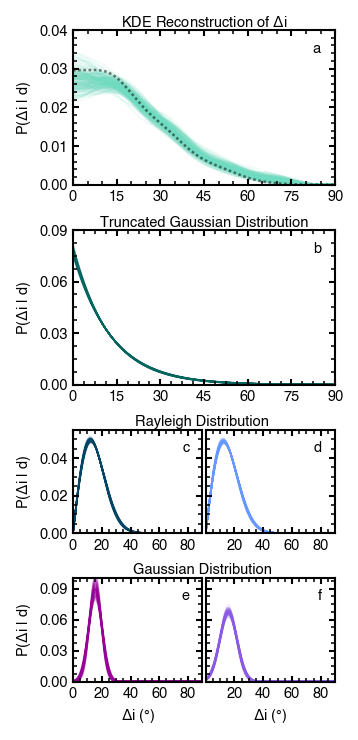

In [73]:
# Plot it all

kde_HBM_plots_width = 5.5 * 0.4
kde_HBM_plots_height = 12.0 * 0.4

kde_HBM_plots_suptitlepad = 5
kde_HBM_plots_labelpad = 3
kde_HBM_plots_titlepad = 2

HBM_key_b1 = 'log-U Pr'
HBM_key_b2 = 'TG Pr'
HBM_key_c1 = 'log-U Pr'
HBM_key_c2 = 'TG Pr'
model_linestyle_b1 = ':'
model_color_b1 = '#004466'
model_dashes_b1 = (2, 1)
model_capstyle_b1 = 'butt'
model_zorder_b1 = 6
model_linestyle_b2 = '-'
model_color_b2 = '#6699ff'
model_dashes_b2 = (2, 0)
model_capstyle_b2 = 'butt'
model_zorder_b2 = 5
model_linestyle_c1 = ':'
model_color_c1 = '#990099'
model_dashes_c1 = (2, 1)
model_capstyle_c1 = 'butt'
model_zorder_c1 = 4
model_linestyle_c2 = '-'
model_color_c2 = '#8c59e4'
model_dashes_c2 = (2, 0)
model_capstyle_c2 = 'butt'
model_zorder_c2 = 3

model_color_f = '#00665f'
kde_color = '#6fdcc1'

ED_Figure_4a_Source_Data = {}
ED_Figure_4b_Source_Data = {}
ED_Figure_4c_Source_Data = {}
ED_Figure_4d_Source_Data = {}
ED_Figure_4e_Source_Data = {}
ED_Figure_4f_Source_Data = {}





fig = plt.figure(figsize=(kde_HBM_plots_width, kde_HBM_plots_height), dpi=150)
axes = fig.subplot_mosaic(
    """
    aa
    ff
    bd
    ce
    """,
    gridspec_kw={'height_ratios': [0.6, 0.6, 0.4, 0.4], 'width_ratios': [0.5, 0.5], "bottom": 0.06, "top": 0.965, "left": 0.1775, "right": 0.972, "wspace": 0.025, "hspace": 0.35}
)

axes['a'].set_ylabel(r'$P(\Delta$i | d)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)
axes['f'].set_ylabel(r'$P(\Delta$i | d)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)
axes['b'].set_ylabel(r'$P(\Delta$i | d)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)
axes['c'].set_ylabel(r'$P(\Delta$i | d)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)


axes['a'].set_title(r'KDE Reconstruction of $\Delta$i', fontsize=font_size, weight='light', pad=kde_HBM_plots_titlepad*0.75)
axes['f'].set_title('Truncated Gaussian Distribution', fontsize=font_size, weight='light', pad=kde_HBM_plots_titlepad*0.75)
axes['b'].set_title('Rayleigh Distribution', fontsize=font_size, weight='light', pad=kde_HBM_plots_titlepad, x=1.0)
axes['c'].set_title('Gaussian Distribution', fontsize=font_size, weight='light', pad=kde_HBM_plots_titlepad, x=1.0)

axes['c'].set_xlabel(r'$\Delta$i ($\degree$)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)
axes['e'].set_xlabel(r'$\Delta$i ($\degree$)', fontsize=font_size, weight='light', labelpad=kde_HBM_plots_labelpad)

draw_alpha = 0.10
draw_lw = 0.75

# Plot Nominal KDE
axes['a'].plot(x_grid_plot, density_estimation_total_positive_x, ls=':', dashes=(1, 1), color='#000000', lw=1.25, alpha=0.5, label='Nominal KDE', zorder=-3)



for kde_i, kde_i_plot in enumerate(kdes_plot):
    axes['a'].plot(x_grid_plot2, kde_i_plot, lw=draw_lw, linestyle='-', color=kde_color, alpha=draw_alpha, zorder=-5)

    ED_Figure_4a_Source_Data['Deltai (deg)'] = x_grid_plot2
    ED_Figure_4a_Source_Data['KDE ' + str(kde_i)] = kde_i_plot

for draw_i in range(len(random_HBM_models['Rayleigh (log-U Pr)'])):
    axes['f'].plot(x_grid_plot, random_HBM_models['Truncated Gaussian (U Pr)'][draw_i], lw=draw_lw, linestyle='-', color=model_color_f, alpha=draw_alpha, zorder=-6)
    axes['b'].plot(x_grid_plot, random_HBM_models['Rayleigh (log-U Pr)'][draw_i], lw=draw_lw, linestyle='-', color=model_color_b1, alpha=draw_alpha, zorder=-5)
    axes['d'].plot(x_grid_plot, random_HBM_models['Rayleigh (TG Pr)'][draw_i], lw=draw_lw, linestyle='-', color=model_color_b2, alpha=draw_alpha, zorder=-6)
    axes['c'].plot(x_grid_plot, random_HBM_models['Gaussian (log-U Pr)'][draw_i], lw=draw_lw, linestyle='-', color=model_color_c1, alpha=draw_alpha, zorder=-5)
    axes['e'].plot(x_grid_plot, random_HBM_models['Gaussian (TG Pr)'][draw_i], lw=draw_lw, linestyle='-', color=model_color_c2, alpha=draw_alpha, zorder=-6)

    ED_Figure_4b_Source_Data['Deltai (deg)'] = x_grid_plot
    ED_Figure_4b_Source_Data['b HBM ' + str(draw_i)] = random_HBM_models['Truncated Gaussian (U Pr)'][draw_i]
    ED_Figure_4c_Source_Data['Deltai (deg)'] = x_grid_plot
    ED_Figure_4c_Source_Data['c HBM ' + str(draw_i)] = random_HBM_models['Rayleigh (log-U Pr)'][draw_i]
    ED_Figure_4d_Source_Data['Deltai (deg)'] = x_grid_plot
    ED_Figure_4d_Source_Data['d HBM ' + str(draw_i)] = random_HBM_models['Rayleigh (TG Pr)'][draw_i]
    ED_Figure_4e_Source_Data['Deltai (deg)'] = x_grid_plot
    ED_Figure_4e_Source_Data['e HBM ' + str(draw_i)] = random_HBM_models['Gaussian (log-U Pr)'][draw_i]
    ED_Figure_4f_Source_Data['Deltai (deg)'] = x_grid_plot
    ED_Figure_4f_Source_Data['f HBM ' + str(draw_i)] = random_HBM_models['Gaussian (TG Pr)'][draw_i]



axes['a'].text(0.93, 0.88, 'a', horizontalalignment='center', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['a'].transAxes)
axes['f'].text(0.93, 0.88, 'b', horizontalalignment='center', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['f'].transAxes) 
axes['b'].text(0.90, 0.83, 'c', horizontalalignment='right', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['b'].transAxes)
axes['d'].text(0.90, 0.83, 'd', horizontalalignment='right', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['d'].transAxes)
axes['c'].text(0.90, 0.83, 'e', horizontalalignment='right', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['c'].transAxes)  
axes['e'].text(0.90, 0.83, 'f', horizontalalignment='right', verticalalignment='center', fontsize=font_size, weight='bold', transform=axes['e'].transAxes) 









xmin, xmax = 0, 90

for ax in axes.keys():
    axes[ax].minorticks_on()
    axes[ax].set_rasterized(False)

    # SPECIFY THE X TICKS
    if ax in ['a', 'f']:
        xticks = [0, 15, 30, 45, 60, 75, 90]
    elif ax in ['b', 'c']:
        xticks = [0, 20, 40, 60, 80]
    else:
        xticks = [20, 40, 60, 80]
    xticklabels = [str(int(xtick)) for xtick in xticks]
    axes[ax].set_xticks(xticks)
    axes[ax].set_xticklabels(xticklabels, fontsize=font_size, weight='light')

    if ax in ['a']:
        yticks = [0.0, 0.01, 0.02, 0.03, 0.04]
    elif ax in ['f']:
        yticks = [0.0, 0.03, 0.06, 0.09]
    elif ax in ['b', 'd']:
        yticks = [0.0, 0.02, 0.04]
    else:
        yticks = [0.0, 0.03, 0.06, 0.09]
    axes[ax].set_yticks(yticks)
    yticklabels = ['{:.2f}'.format(ytick) for ytick in yticks]

    if ax in ['a', 'f', 'b', 'c']:
    # if ax in ['a', 'b', 'c']:
        axes[ax].set_yticklabels(yticklabels, fontsize=font_size, weight='light')
    else:
        axes[ax].set_yticklabels([])

    axes[ax].set_xlim(xmin, xmax)
    if ax in ['a']:
        axes[ax].set_ylim(0, 0.04)
    elif ax in ['f']:
        axes[ax].set_ylim(0, 0.09)
    elif ax in ['b', 'd']:
        axes[ax].set_ylim(0, 0.055)
    else:
        axes[ax].set_ylim(0, 0.10)

    # Make sure line thicknesses meet journal standards
    spine_linewidth = 1.0
    minor_linewidth = 0.75
    major_linewidth = 1.0
    minor_linelength = 1.75
    major_linelength = 3.0
    for spine in axes[ax].spines.values():
        spine.set_linewidth(spine_linewidth)

    axes[ax].tick_params(which='minor', length=minor_linelength, width=minor_linewidth, labelsize=font_size)
    axes[ax].tick_params(which='major', length=major_linelength, width=major_linewidth, pad=2.5, labelsize=font_size)

minor_locator_a = AutoMinorLocator(3)
axes['a'].xaxis.set_minor_locator(minor_locator_a)

minor_locator_b = AutoMinorLocator(4)
axes['b'].xaxis.set_minor_locator(minor_locator_b)
axes['d'].xaxis.set_minor_locator(minor_locator_b)
axes['c'].xaxis.set_minor_locator(minor_locator_b)
axes['e'].xaxis.set_minor_locator(minor_locator_b)

nature_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3_Drafts/Figures_and_Tables/'
save_string = 'Extended_Data_Figure_4.pdf'
fig.savefig(nature_figures_directory + save_string, dpi=300)

nature_figures_directory2 = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Figures_and_Tables/'
save_string2 = 'Biddle_EDfig4.pdf'
fig.savefig(nature_figures_directory2 + save_string2, dpi=300)

print('Figure is saved in the following directory:')
print(nature_figures_directory)

ED_Figure_4a_Source_Data_df = pd.DataFrame(ED_Figure_4a_Source_Data)
ED_Figure_4a_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4a.csv', index=False)
ED_Figure_4b_Source_Data_df = pd.DataFrame(ED_Figure_4b_Source_Data)
ED_Figure_4b_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4b.csv', index=False)
ED_Figure_4c_Source_Data_df = pd.DataFrame(ED_Figure_4c_Source_Data)
ED_Figure_4c_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4c.csv', index=False)
ED_Figure_4d_Source_Data_df = pd.DataFrame(ED_Figure_4d_Source_Data)
ED_Figure_4d_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4d.csv', index=False)
ED_Figure_4e_Source_Data_df = pd.DataFrame(ED_Figure_4e_Source_Data)
ED_Figure_4e_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4e.csv', index=False)
ED_Figure_4f_Source_Data_df = pd.DataFrame(ED_Figure_4f_Source_Data)
ED_Figure_4f_Source_Data_df.to_csv('/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Nature/Submission_3/Source_Data/Extended_Data_Figure_4f.csv', index=False)

